# Detecting Bank Account Fraud
##

### Import
Raw Data at https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/data


Data Dictionary at https://github.com/feedzai/bank-account-fraud/blob/main/documents/datasheet.pdf

Based on Data Dictionary:
-1 is a missing value for the following fields:
prev_address_months_count (60 percentile still missing),  
current_address_months_count,
bank_months_count,
session_length_in_minutes, and
device_distinct_emails




neg is a missing value for the following field:
intended_balcon_amount

In [1]:
import numpy as np
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pexp
sys.tracebacklimit=0
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
abspath_curr = '/content/drive/MyDrive/Colab Notebooks/Bank/'
abspath_util_deep = '/content/drive/MyDrive/Colab Notebooks/'

Mounted at /content/drive


In [3]:
%cd $abspath_util_deep

/content/drive/MyDrive/Colab Notebooks


In [4]:
file_path = abspath_curr + "archive (6)/Base.csv"

In [5]:
data_clean = pd.read_csv(file_path)
data_clean

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,other,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,macintosh,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,other,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,linux,1,1,0,7


In [6]:
data_clean.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
data_clean.describe(percentiles = [.2, .4, .6, .8])

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
20%,0.000000,0.200000,0.182615,-1.000000,13.000000,20.000000,5.724910e-03,-1.257829,817.000000,2991.503101,...,1.000000,-1.000000,0.000000,200.000000,0.000000,2.597703,0.000000,1.000000,0.0,1.000000
40%,0.000000,0.500000,0.390272,-1.000000,39.000000,30.000000,1.180533e-02,-0.972005,1107.000000,4558.751348,...,1.000000,1.000000,0.000000,200.000000,0.000000,4.310156,0.000000,1.000000,0.0,3.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
60%,0.000000,0.700000,0.588109,-1.000000,73.000000,40.000000,1.899179e-02,-0.664528,1473.000000,6148.046597,...,1.000000,12.000000,0.000000,200.000000,0.000000,6.162644,1.000000,1.000000,0.0,4.000000
80%,0.000000,0.900000,0.805518,27.000000,156.000000,40.000000,2.982589e-02,19.101772,2244.000000,8187.818391,...,1.000000,26.000000,1.000000,1000.000000,0.000000,10.303067,1.000000,1.000000,0.0,6.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


In [8]:
pd.set_option('display.max_rows', 50)
data_clean.describe(percentiles = [.2, .4, .6, .8]).T

,count,mean,std,min,20%,40%,50%,60%,80%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.200000,0.500000,0.600000,0.700000,0.900000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.182615,0.390272,0.492153,0.588109,0.805518,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,-1.000000,-1.000000,27.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,13.000000,39.000000,52.000000,73.000000,156.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,30.000000,40.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.005725,0.011805,0.015176,0.018992,0.029826,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.257829,-0.972005,-0.830507,-0.664528,19.101772,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,817.000000,1107.000000,1263.000000,1473.000000,2244.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,2991.503101,4558.751348,5319.769349,6148.046597,8187.818391,16715.565404


In [9]:
data_clean.describe(include="object")

,payment_type,employment_status,housing_status,source,device_os
count,1000000,1000000,1000000,1000000,1000000
unique,5,7,7,2,5
top,AB,CA,BC,INTERNET,other
freq,370554,730252,372143,992952,342728


In [10]:
def clean_string_vars(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.upper().str.strip()
    return df

clean_string_vars(data_clean)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,LINUX,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,OTHER,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,WINDOWS,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,LINUX,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,OTHER,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,-1,143,30,0.051348,-0.826239,AB,530,...,0,1500.0,0,INTERNET,16.967770,OTHER,0,1,0,7
999996,0,0.9,0.824544,-1,193,30,0.009591,0.008307,AC,408,...,1,1000.0,0,INTERNET,1.504109,MACINTOSH,0,1,0,7
999997,0,0.8,0.140891,-1,202,10,0.059287,50.609995,AA,749,...,0,200.0,0,INTERNET,16.068595,OTHER,0,1,0,7
999998,0,0.9,0.002480,52,3,30,0.023357,-1.313387,AB,707,...,0,200.0,0,INTERNET,1.378683,LINUX,1,1,0,7


In [11]:
def freq_tables(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            print(column)
            values = pd.DataFrame(df[column].value_counts())
            print(values)
freq_tables(data_clean)

payment_type
    payment_type
AB        370554
AA        258249
AC        252071
AD        118837
AE           289
employment_status
    employment_status
CA             730252
CB             138288
CF              44034
CC              37758
CD              26522
CE              22693
CG                453
housing_status
    housing_status
BC          372143
BB          260965
BA          169675
BE          169135
BD           26161
BF            1669
BG             252
source
          source
INTERNET  992952
TELEAPP     7048
device_os
           device_os
OTHER         342728
LINUX         332712
WINDOWS       263506
MACINTOSH      53826
X11             7228


In [12]:
data_clean.duplicated().sum() # No duplicates in the data

0

In [13]:
values_fraud_bool = pd.DataFrame(data_clean['fraud_bool'].value_counts())
values_fraud_bool

,fraud_bool
0,988971
1,11029


In [14]:
values_fraud_bool_per = pd.DataFrame(data_clean['fraud_bool'].value_counts(normalize=True)*100)
values_fraud_bool_per

,fraud_bool
0,98.8971
1,1.1029


In [15]:
device_fraud_count_per = pd.DataFrame(data_clean['device_fraud_count'].value_counts(normalize=True)*100)
device_fraud_count_per

,device_fraud_count
0,100.0


In [16]:
cor_table = data_clean.corr()
#cor_table

<ipython-input-16-f7b46909545b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_table = data_clean.corr()


In [17]:
def corr_format(val):
    color = 'blue' if abs(val) > 0.3 else 'gray'  # Change to desired threshold
    return f'color: {color}'

In [18]:
cor_table_formatted = cor_table.style.applymap(corr_format)
cor_table_formatted

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,email_is_free,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
fraud_bool,1.000000,0.045079,-0.036720,-0.026031,0.033701,0.062959,0.000567,-0.024524,0.005212,-0.016892,-0.011183,-0.011536,-0.011577,-0.043224,0.070624,0.027758,-0.035128,-0.013180,-0.003222,-0.035156,0.068907,0.016885,0.008999,-0.050296,0.035704,nan,0.013250
income,0.045079,1.000000,-0.038519,0.018209,-0.036985,0.125822,-0.015877,0.059046,-0.080581,-0.096431,-0.101269,-0.106333,0.007474,-0.062348,0.171447,-0.024900,0.024938,0.014979,-0.004514,0.086861,0.108868,0.011452,-0.055430,-0.043584,-0.009992,nan,0.116479
name_email_similarity,-0.036720,-0.038519,1.000000,-0.018186,0.050305,-0.048902,-0.007736,0.029040,0.025114,0.024881,0.035221,0.039968,-0.001470,0.022994,0.049126,-0.066897,-0.002931,0.008966,-0.006351,0.011021,0.073159,-0.015224,0.005998,0.014342,-0.017804,nan,-0.042949
prev_address_months_count,-0.026031,0.018209,-0.018186,1.000000,-0.271730,-0.069178,0.078107,-0.009428,-0.029638,-0.001265,0.009020,0.005413,-0.040628,0.059560,-0.016104,-0.014348,-0.053353,0.004757,-0.045550,-0.042949,-0.028474,0.019242,0.051425,0.031672,0.011924,nan,-0.001793
current_address_months_count,0.033701,-0.036985,0.050305,-0.271730,1.000000,0.142863,-0.057836,0.057601,0.047286,0.027508,0.018753,0.026172,0.054202,-0.174714,0.094976,-0.079519,0.129102,-0.088268,0.071997,0.060732,0.130594,-0.012355,-0.033574,-0.050539,-0.000760,nan,-0.024541
customer_age,0.062959,0.125822,-0.048902,-0.069178,0.142863,1.000000,-0.035999,-0.013000,-0.014176,-0.022063,-0.010030,-0.004303,0.048412,-0.420173,0.166094,-0.000357,0.212713,-0.147098,0.012907,0.108743,0.148857,-0.001606,0.025049,-0.024272,0.025709,nan,0.005694
days_since_request,0.000567,-0.015877,-0.007736,0.078107,-0.057836,-0.035999,1.000000,0.019782,0.000249,0.027968,0.023869,0.017706,-0.018173,0.018731,-0.088141,0.008163,-0.042009,0.005130,-0.027460,-0.048861,-0.068670,0.001066,0.049613,0.000337,0.009025,nan,-0.017938
intended_balcon_amount,-0.024524,0.059046,0.029040,-0.009428,0.057601,-0.013000,0.019782,1.000000,0.002251,0.042849,0.064080,0.051407,0.102919,-0.027343,0.002058,-0.014754,0.000019,0.038625,0.178374,0.096676,0.057860,0.007933,0.022811,-0.020689,-0.019910,nan,-0.043070
zip_count_4w,0.005212,-0.080581,0.025114,-0.029638,0.047286,-0.014176,0.000249,0.002251,1.000000,0.142372,0.201186,0.302955,0.005958,0.126885,-0.102645,0.021731,-0.035661,0.012122,0.053637,-0.015015,-0.011651,0.017212,0.039687,0.022283,0.020550,nan,-0.287203
velocity_6h,-0.016892,-0.096431,0.024881,-0.001265,0.027508,-0.022063,0.027968,0.042849,0.142372,1.000000,0.464003,0.400254,0.020140,0.118752,-0.145254,0.028379,-0.036820,-0.010751,0.014874,-0.007049,-0.025005,-0.000450,0.054491,0.002797,0.030030,nan,-0.409148


Based on correlation results included above we will:

1.   drop date_of_birth_distinct_emails_4w while keeping customer_age (due to  correlation between the variables)
2.   drop month, velocity_6h, and velocity_4w while keeping velocity_24h (due to correlation between the variables)
3. proposed_credit_limit and credit_risk_score both have high correlations to each other, therefore only one can be used in a given model


Based on Data Dictionary:

-1 is a missing value for the following fields:
prev_address_months_count (60 percentile still missing),  
current_address_months_count,
bank_months_count,
session_length_in_minutes, and
device_distinct_emails




neg is a missing value for the following field:
intended_balcon_amount




In [19]:
pd.set_option('display.max_columns', 500)
data_clean.groupby('fraud_bool').describe()

income                                               \
               count      mean       std  min  25%  50%  75%  max   
fraud_bool                                                          
0           988971.0  0.561313  0.290309  0.1  0.3  0.6  0.8  0.9   
1            11029.0  0.686635  0.265579  0.1  0.6  0.8  0.9  0.9   

           name_email_similarity                                          \
                           count      mean       std       min       25%   
fraud_bool                                                                 
0                       988971.0  0.494815  0.288855  0.000001  0.226963   
1                        11029.0  0.393161  0.295607  0.000132  0.134257   

                                         prev_address_months_count             \
                 50%       75%       max                     count       mean   
fraud_bool                                                                      
0           0.493571  0.756211  0.999999                  988971.0  16.839647   
1           0.292420  0.676543  0.999953                   11029.0   5.861365   

                                                   \
                  std  min  25%  50%   75%    max   
fraud_bool                                          
0           44.140319 -1.0 -1.0 -1.0  13.0  383.0   
1           32.816956 -1.0 -1.0 -1.0  -1.0  357.0   

           current_address_months_count                                    \
                                  count        mean        std  min   25%   
fraud_bool                                                                  
0                              988971.0   86.273232  88.389648 -1.0  19.0   
1                               11029.0  114.801161  85.324351 -1.0  53.0   

                               customer_age                                    \
             50%    75%    max        count       mean        std   min   25%   
fraud_bool                                                                      
0           52.0  129.0  428.0     988971.0  33.609125  11.989302  10.0  20.0   
1           94.0  156.0  392.0      11029.0  40.858645  13.086334  10.0  30.0   

                             days_since_request                      \
             50%   75%   max              count      mean       std   
fraud_bool                                                            
0           30.0  40.0  90.0           988971.0  1.025383  5.378088   
1           40.0  50.0  90.0            11029.0  1.054615  5.707977   

                                                                   \
                     min       25%       50%       75%        max   
fraud_bool                                                          
0           4.036860e-09  0.007209  0.015203  0.026361  78.456904   
1           1.013114e-06  0.005911  0.013094  0.023265  75.495921   

           intended_balcon_amount                                            \
                            count      mean        std        min       25%   
fraud_bool                                                                    
0                        988971.0  8.713907  20.266690 -15.530555 -1.181296   
1                         11029.0  3.962009  16.622067  -8.249792 -1.195618   

                                           zip_count_4w               \
                 50%       75%         max        count         mean   
fraud_bool                                                             
0          -0.829552  5.789258  112.956928     988971.0  1572.138693   
1          -0.900578 -0.562268  111.321272      11029.0  1622.311542   

                                                             velocity_6h  \
                    std   min    25%     50%     75%     max       count   
fraud_bool                                                                 
0           1005.357780   1.0  894.0  1262.0  1943.0  6700.0    988971.0   
1           1005.687071  18.0  909.0  1328.0  2050.0  6368.0

fraud_bool


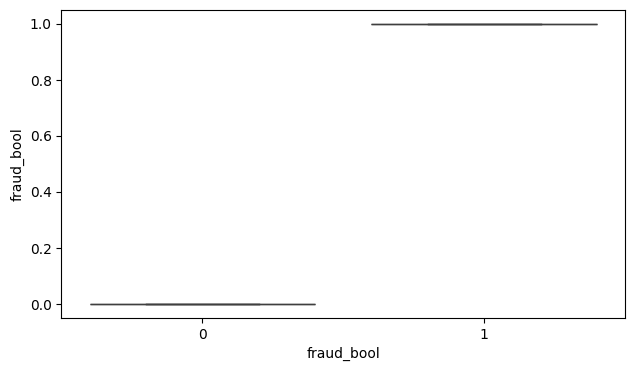

income


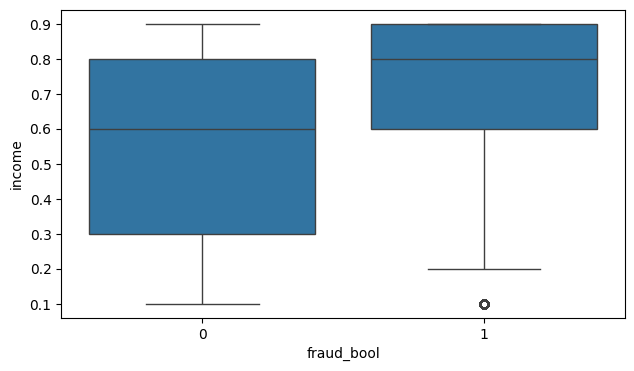

name_email_similarity


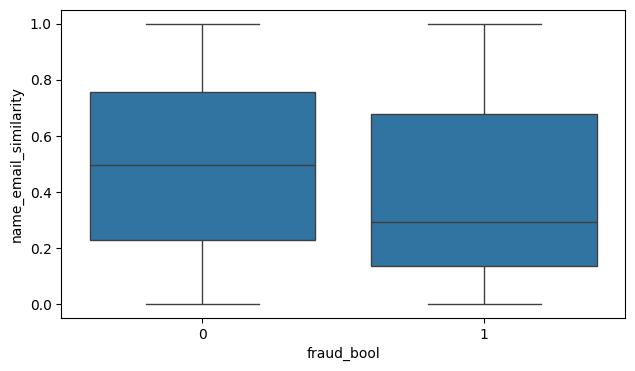

prev_address_months_count


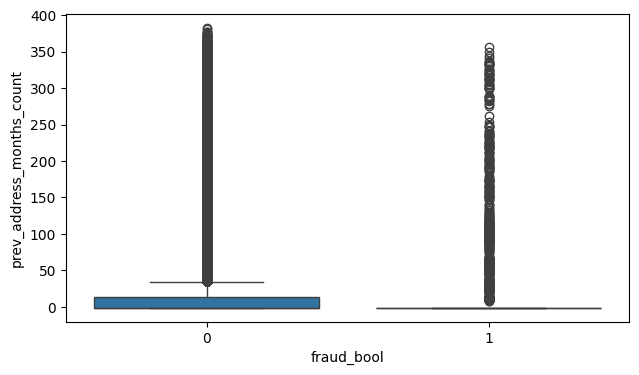

current_address_months_count


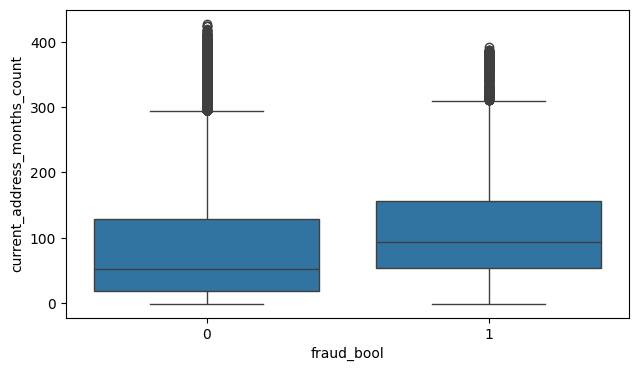

customer_age


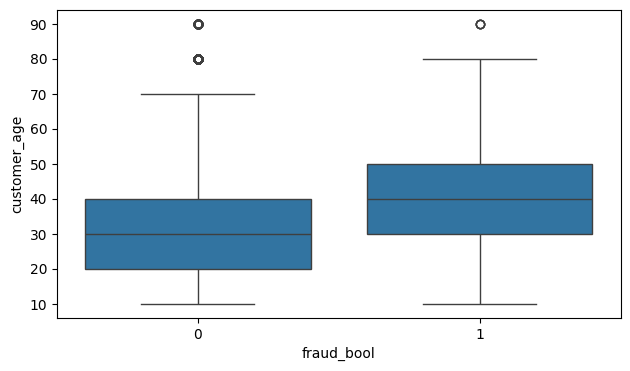

days_since_request


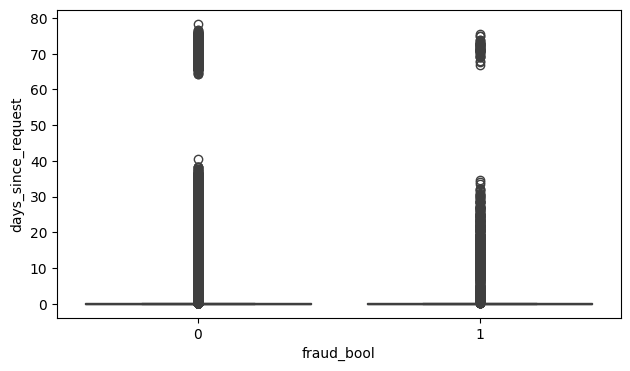

intended_balcon_amount


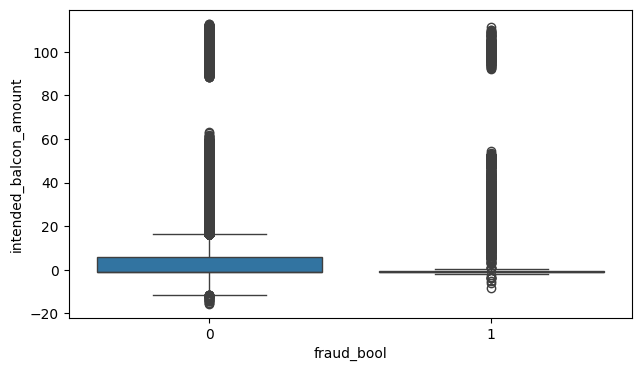

zip_count_4w


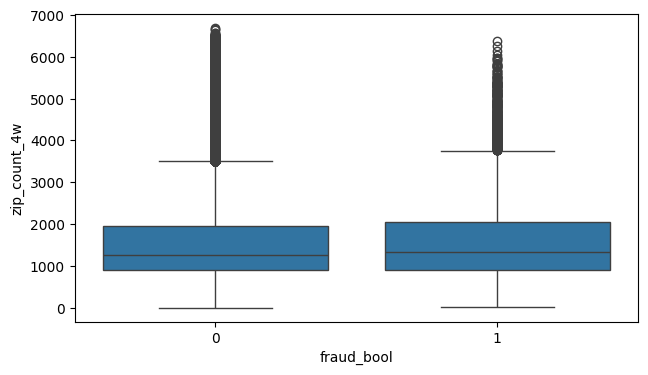

velocity_6h


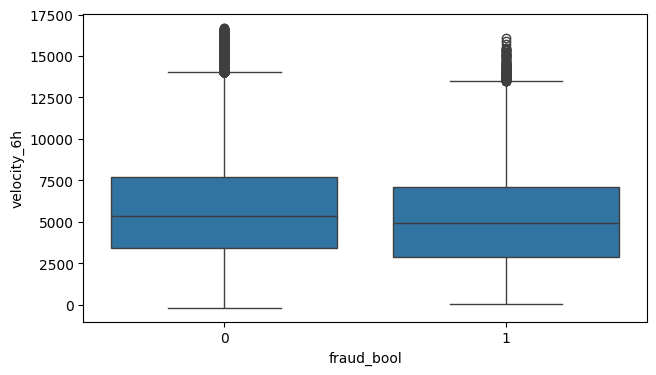

velocity_24h


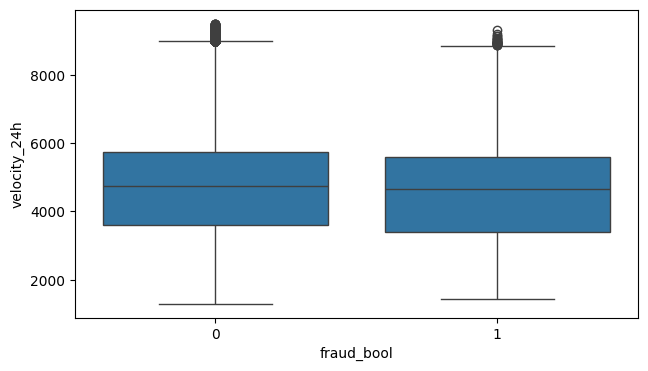

velocity_4w


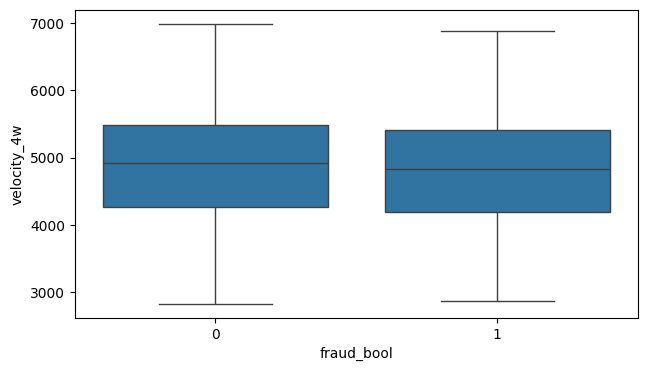

bank_branch_count_8w


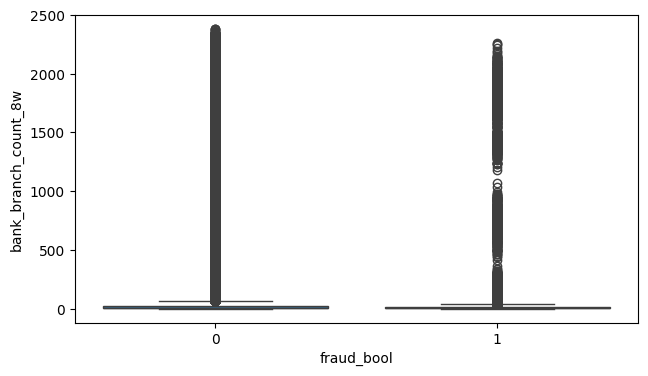

date_of_birth_distinct_emails_4w


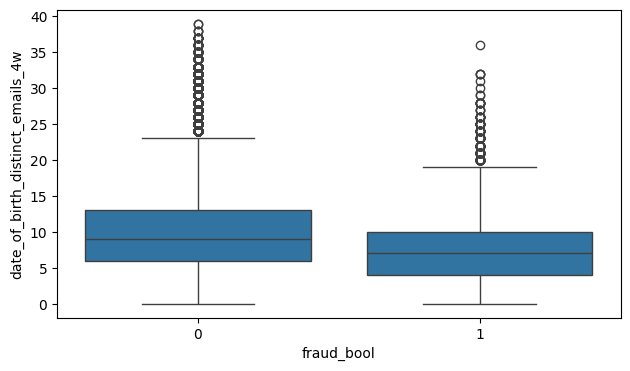

credit_risk_score


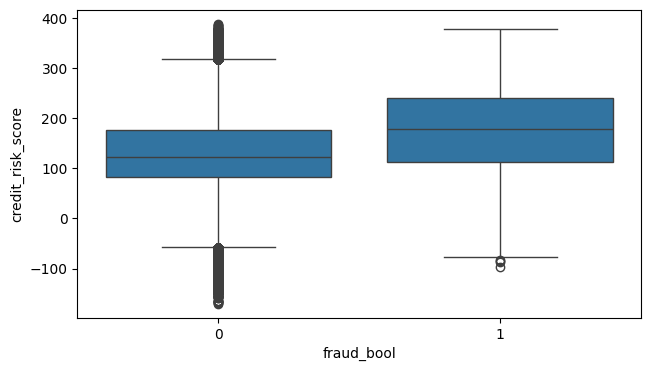

email_is_free


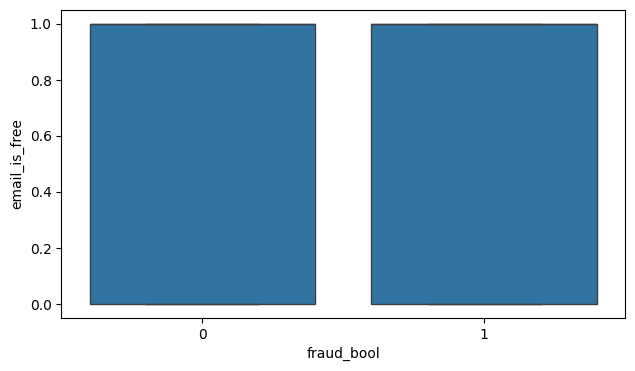

phone_home_valid


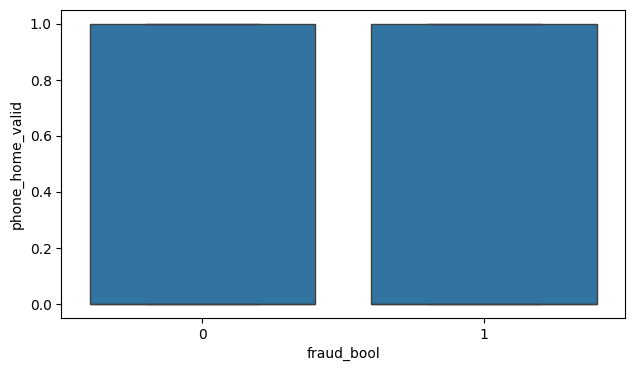

phone_mobile_valid


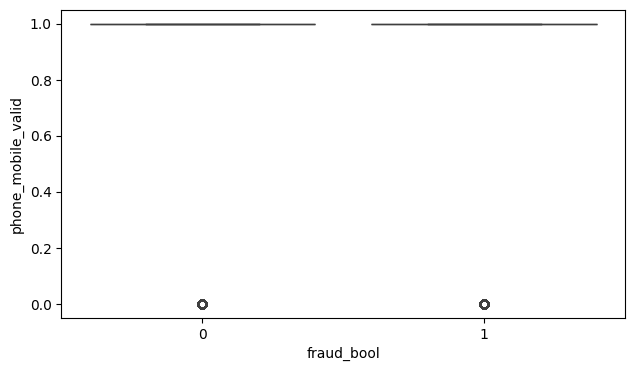

bank_months_count


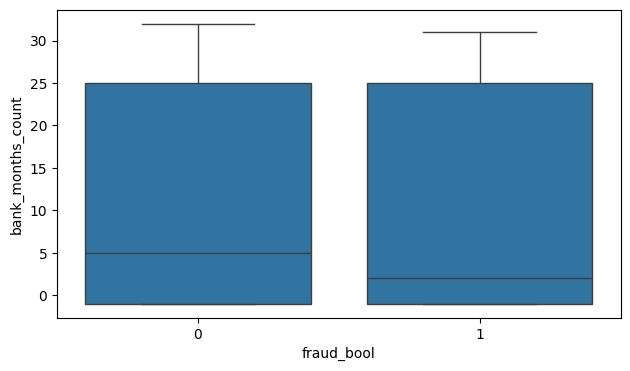

has_other_cards


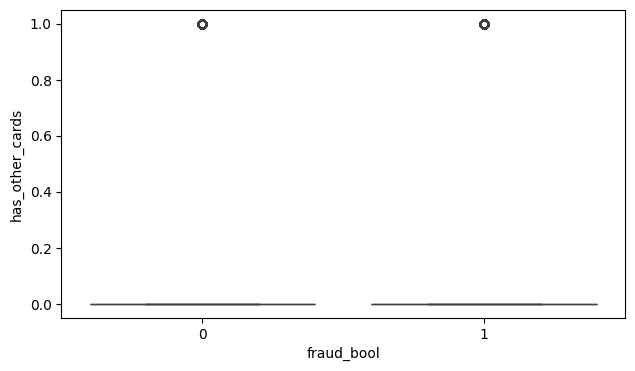

proposed_credit_limit


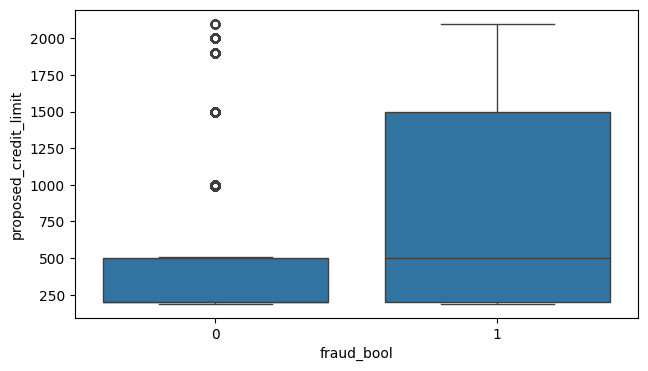

foreign_request


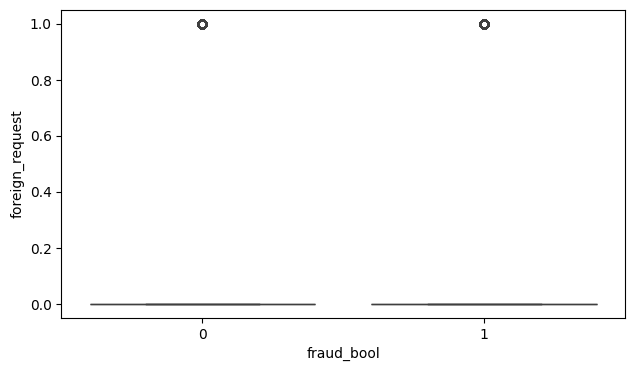

session_length_in_minutes


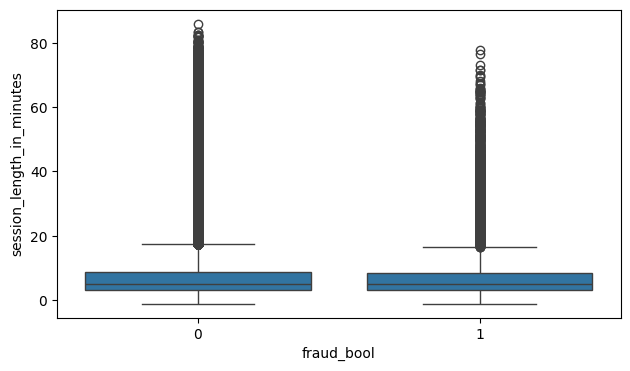

keep_alive_session


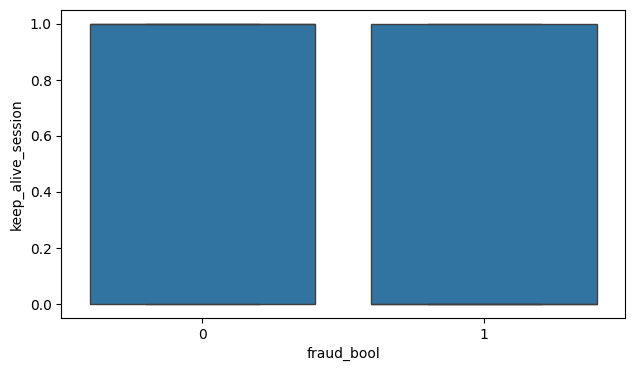

device_distinct_emails_8w


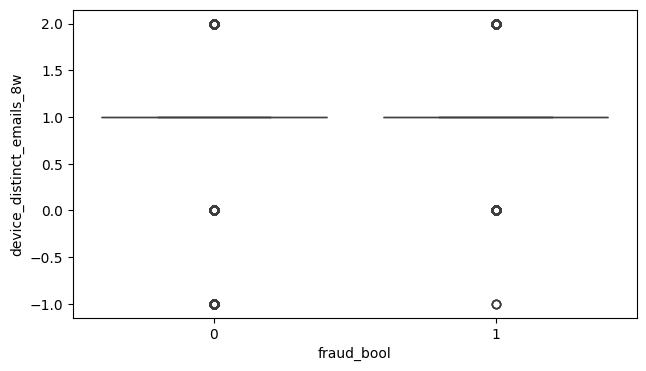

device_fraud_count


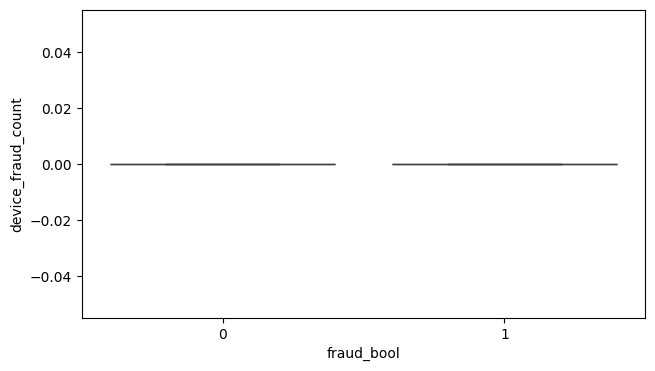

month


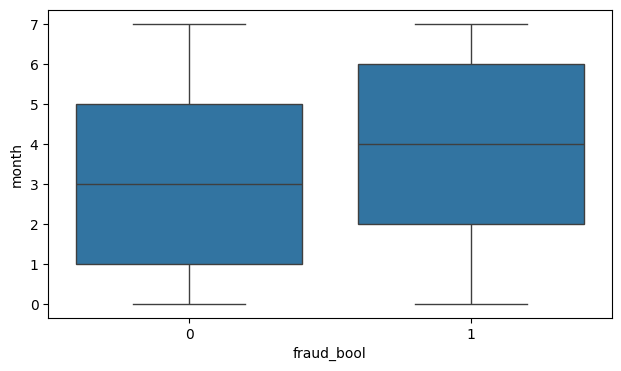

In [20]:
col_list = data_clean.select_dtypes(include=np.number).columns.tolist()
for col in col_list:
    print(col)
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=data_clean['fraud_bool'], y=data_clean[col])
    plt.show()

In [21]:
print(col_list)

['fraud_bool', 'income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w', 'bank_branch_count_8w', 'date_of_birth_distinct_emails_4w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count', 'month']


In [22]:
def plot_histograms(col_list, data_frame):
    for col in col_list:
        fig = pexp.histogram(data_frame, x=col, color='fraud_bool',
                            marginal="box",
                            barmode="overlay",
                            histnorm='density'
                            )
        fig.update_layout(
            title=f'Histogram of {col}',
            xaxis_title=col,
            yaxis_title='Density',
            width=800,
            height=600
        )
        fig.show()

In [23]:
#col_list2=['income', 'name_email_similarity', 'prev_address_months_count', 'current_address_months_count', 'customer_age', 'days_since_request', 'intended_balcon_amount', 'zip_count_4w', 'velocity_24h', 'bank_branch_count_8w', 'credit_risk_score', 'email_is_free', 'phone_home_valid', 'phone_mobile_valid', 'bank_months_count', 'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'session_length_in_minutes', 'keep_alive_session', 'device_distinct_emails_8w', 'device_fraud_count']
#plot_histograms(col_list2, data_clean)

Income and proposed_credit_limit appear to be good fields to use in the model, less overlap in fraud_bool based on the boxplots.

In [24]:
drop_columns = ['date_of_birth_distinct_emails_4w', 'month', 'velocity_6h', 'velocity_4w'] # device_fraud_count
data_clean = data_clean.drop(columns=drop_columns)

In [25]:
#filepath = '/Users/kys/Downloads/DS5110BigData/Project/Data/Bank/Data_Clean.csv'
#data_clean.to_csv(filepath, index=False)

In [26]:
data_samp = data_clean.sample(n=100000, replace=False, random_state=1)

# Prep for Modeling

In [27]:
try:
    import pycaret
except:
    !pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 28.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 53.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 64.6 MB/

In [ ]:
values_fraud_bool = pd.DataFrame(data_clean['fraud_bool'].value_counts())
values_fraud_bool

,fraud_bool
0,988971
1,11029


In [ ]:
values_fraud_bool_per = pd.DataFrame(data_clean['fraud_bool'].value_counts(normalize=True)*100)
values_fraud_bool_per

,fraud_bool
0,98.8971
1,1.1029


In [ ]:
values_fraud_bool_samp = pd.DataFrame(data_samp['fraud_bool'].value_counts())
values_fraud_bool_samp

,fraud_bool
0,98861
1,1139


In [ ]:
values_fraud_bool_per_samp = pd.DataFrame(data_samp['fraud_bool'].value_counts(normalize=True)*100)
values_fraud_bool_per_samp

,fraud_bool
0,98.861
1,1.139


Referenced https://www.pycaret.org/tutorials/html/CLF101.html for modeling code.

Referenced https://pycaret.gitbook.io/docs/get-started/preprocessing/feature-selection for feature selection.

At the moment we did not use a fix_imbalance method. We plan on trying to use different fix_imbalance methods if the results of these intital models needs much improvement. https://pycaret.gitbook.io/docs/get-started/preprocessing/data-preparation

# Model 1:

In [ ]:
from pycaret.classification import *
data_samp_setup = setup(data = data_samp, target = 'fraud_bool', session_id=1, feature_selection=True, feature_selection_estimator='lightgbm', n_features_to_select=6,
                        remove_multicollinearity=True, multicollinearity_threshold = 0.6) # update later to use full data

# feature_selection_estimator='lightgbm' is default value
# n_features_to_select=0.2 is default value

[LightGBM] [Info] Number of positive: 797, number of negative: 69203
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032064 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2663
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.011386 -> initscore=-4.463945
[LightGBM] [Info] Start training from score -4.463945


,Description,Value
0,Session id,1
1,Target,fraud_bool
2,Target type,Binary
3,Original data shape,"(100000, 28)"
4,Transformed data shape,"(100000, 7)"
5,Transformed train set shape,"(70000, 7)"
6,Transformed test set shape,"(30000, 7)"
7,Numeric features,22
8,Categorical features,5
9,Preprocess,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.1720
ridge,Ridge Classifier,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7860
rf,Random Forest Classifier,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,14.5440
ada,Ada Boost Classifier,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.2230
lda,Linear Discriminant Analysis,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.7840
et,Extra Trees Classifier,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.2390
dummy,Dummy Classifier,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.6650
knn,K Neighbors Classifier,0.9885,0.0000,0.0000,0.0000,0.0000,-0.0002,-0.0007,2.3160
xgboost,Extreme Gradient Boosting,0.9885,0.0000,0.0000,0.0000,0.0000,-0.0002,-0.0007,2.2150
lightgbm,Light Gradient Boosting Machine,0.9884,0.0000,0.0025,0.0533,0.0048,0.0042,0.0098,2.8800


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Since our data is imbalanced we will be looking at recall, precision, and the F1 measure.
The QDA model performed best in regards to recall (sensitivity).
The ADA model performed best in regards to precision.
The LDA model performed best in regards to the F1 measure.

Income, proposed_credit_limit, and customer_age appear to be good fields to use in the model, less overlap in fraud_bool based on the boxplots.

In [ ]:
models = ['lr', 'knn', 'ridge', 'rf', 'et', 'dummy', 'svm', 'ada', 'xgboost', 'gbc', 'lightgbm', 'lda', 'dt', 'nb', 'qda']

for model_name in models:
    model = create_model(model_name)
    print(model)
    tuned_model = tune_model(model, optimize = 'F1')
    print(tuned_model)

    #plot_model(tuned_model, plot='pr', save=True, verbose=False)
    #plot_model(tuned_model, plot='feature', save=True, verbose=False)
    #plot_model(tuned_model, plot='confusion_matrix', save=True, verbose=False)
    predict_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6686,0.0000,0.6076,0.0205,0.0397,0.0183,0.0620
1,0.6684,0.0000,0.5949,0.0201,0.0389,0.0175,0.0592
2,0.6621,0.0000,0.6962,0.0230,0.0444,0.0231,0.0797
3,0.6617,0.0000,0.5875,0.0197,0.0382,0.0164,0.0561
4,0.6067,0.0000,0.6375,0.0184,0.0357,0.0138,0.0530
5,0.6084,0.0000,0.6500,0.0188,0.0366,0.0147,0.0561
6,0.6813,0.0000,0.6875,0.0243,0.0470,0.0255,0.0838
7,0.6827,0.0000,0.6000,0.0215,0.0414,0.0198,0.0647
8,0.6837,0.0000,0.6250,0.0224,0.0432,0.0216,0.0705


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


LogisticRegression(C=0.073, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6651,0.7025,0.6491,0.0219,0.0423,0.0207,0.0705


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9886,0.0000,0.0000,0.0000,0.0000,-0.0003,-0.0013
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9884,0.0000,0.0000,0.0000,0.0000,-0.0003,-0.0013
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9884,0.0000,0.0000,0.0000,0.0000,-0.0003,-0.0013
8,0.9884,0.0000,0.0000,0.0000,0.0000,-0.0003,-0.0013


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9791,0.0000,0.0000,0.0000,0.0000,-0.0105,-0.0105
1,0.9791,0.0000,0.0633,0.0649,0.0641,0.0536,0.0536
2,0.9787,0.0000,0.0380,0.0395,0.0387,0.0280,0.0280
3,0.9780,0.0000,0.0000,0.0000,0.0000,-0.0111,-0.0111
4,0.9764,0.0000,0.0000,0.0000,0.0000,-0.0119,-0.0119
5,0.9763,0.0000,0.0250,0.0222,0.0235,0.0116,0.0116
6,0.9794,0.0000,0.0250,0.0294,0.0270,0.0167,0.0168
7,0.9774,0.0000,0.0125,0.0125,0.0125,0.0011,0.0011
8,0.9766,0.0000,0.0125,0.0116,0.0120,0.0002,0.0002


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='distance')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.9771,0.5087,0.0292,0.0275,0.0283,0.0168,0.0168


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=1, solver='auto',
                tol=0.0001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=1, solver='auto',
                tol=0.0001)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.9886,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7700,0.0000,0.5063,0.0248,0.0473,0.0264,0.0701
1,0.7371,0.0000,0.4937,0.0212,0.0407,0.0194,0.0561
2,0.7589,0.0000,0.5443,0.0254,0.0485,0.0275,0.0754
3,0.7067,0.0000,0.5875,0.0227,0.0438,0.0223,0.0689
4,0.5966,0.0000,0.6625,0.0186,0.0362,0.0143,0.0559
5,0.6147,0.0000,0.7000,0.0205,0.0399,0.0181,0.0684
6,0.7447,0.0000,0.7500,0.0328,0.0629,0.0419,0.1197
7,0.7359,0.0000,0.5625,0.0242,0.0464,0.0251,0.0723
8,0.7617,0.0000,0.6000,0.0285,0.0544,0.0333,0.0904


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=4, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       n_estimators=90, n_jobs=-1, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7707,0.7184,0.5409,0.0268,0.0510,0.0300,0.0793


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1, verbose=0,
                     warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7797,0.0000,0.4810,0.0247,0.0470,0.0261,0.0674
1,0.7906,0.0000,0.4051,0.0221,0.0418,0.0209,0.0521
2,0.8340,0.0000,0.3671,0.0254,0.0475,0.0270,0.0590
3,0.7459,0.0000,0.4875,0.0219,0.0420,0.0206,0.0577
4,0.4326,0.0000,0.7750,0.0154,0.0303,0.0080,0.0438
5,0.4471,0.0000,0.8000,0.0163,0.0320,0.0098,0.0520
6,0.8477,0.0000,0.5250,0.0393,0.0730,0.0529,0.1112
7,0.7529,0.0000,0.5125,0.0237,0.0453,0.0239,0.0660
8,0.8237,0.0000,0.3500,0.0231,0.0434,0.0225,0.0504


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


ExtraTreesClassifier(bootstrap=True, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='entropy',
                     max_depth=2, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.05,
                     min_samples_leaf=6, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, monotonic_cst=None,
                     n_estimators=300, n_jobs=-1, oob_score=False,
                     random_state=1, verbose=0, warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8222,0.6584,0.4269,0.0276,0.0519,0.0311,0.0707


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=1, strategy='prior')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5019,0.0000,0.4557,0.0103,0.0202,-0.0019,-0.0089
1,0.5053,0.0000,0.6076,0.0138,0.0270,0.0050,0.0236
2,0.5033,0.0000,0.5190,0.0118,0.0230,0.0010,0.0047
3,0.5017,0.0000,0.4500,0.0103,0.0202,-0.0022,-0.0101
4,0.5040,0.0000,0.5500,0.0126,0.0247,0.0024,0.0114
5,0.5020,0.0000,0.4625,0.0106,0.0208,-0.0016,-0.0074
6,0.5037,0.0000,0.5375,0.0124,0.0242,0.0019,0.0087
7,0.5034,0.0000,0.5250,0.0121,0.0236,0.0013,0.0060
8,0.5017,0.0000,0.4500,0.0103,0.0202,-0.0022,-0.0101


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits


DummyClassifier(constant=None, random_state=1, strategy='uniform')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.5010,0.5000,0.5205,0.0119,0.0232,0.0010,0.0045


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9876,0.0000,0.0000,0.0000,0.0000,-0.0018,-0.0034
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9879,0.0000,0.0125,0.1429,0.0230,0.0212,0.0391
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.0284,0.0000,1.0000,0.0116,0.0230,0.0004,0.0141


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9857,0.0000,0.0250,0.0833,0.0385,0.0334,0.0397
4,0.7799,0.0000,0.3500,0.0185,0.0351,0.0136,0.0348
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9856,0.0000,0.0125,0.0435,0.0194,0.0144,0.0173
7,0.9860,0.0000,0.0000,0.0000,0.0000,-0.0042,-0.0055
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.4, fit_intercept=False,
              l1_ratio=0.1200000001, learning_rate='invscaling', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l1',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9886,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9886,0.7160,0.0000,0.0000,0.0000,0.0000,0.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9884,0.0000,0.0000,0.0000,0.0000,-0.0006,-0.0018
1,0.9883,0.0000,0.0000,0.0000,0.0000,-0.0008,-0.0022
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9884,0.0000,0.0000,0.0000,0.0000,-0.0003,-0.0013
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9819,0.0000,0.0506,0.0714,0.0593,0.0504,0.0511
1,0.9804,0.0000,0.0886,0.0972,0.0927,0.0828,0.0829
2,0.9799,0.0000,0.0759,0.0811,0.0784,0.0683,0.0683
3,0.9826,0.0000,0.0500,0.0800,0.0615,0.0532,0.0547
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9813,0.0000,0.0750,0.0952,0.0839,0.0746,0.0751
7,0.9824,0.0000,0.0750,0.1091,0.0889,0.0803,0.0818
8,0.9796,0.0000,0.1000,0.1013,0.1006,0.0903,0.0903


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9797,0.7154,0.0789,0.0839,0.0813,0.0711,0.0711


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9874,0.0000,0.0000,0.0000,0.0000,-0.0023,-0.0038
1,0.9880,0.0000,0.0127,0.1429,0.0233,0.0215,0.0394
2,0.9880,0.0000,0.0127,0.1429,0.0233,0.0215,0.0394
3,0.9880,0.0000,0.0000,0.0000,0.0000,-0.0011,-0.0026
4,0.9877,0.0000,0.0000,0.0000,0.0000,-0.0016,-0.0031
5,0.9870,0.0000,0.0000,0.0000,0.0000,-0.0028,-0.0043
6,0.9877,0.0000,0.0000,0.0000,0.0000,-0.0016,-0.0031
7,0.9881,0.0000,0.0000,0.0000,0.0000,-0.0008,-0.0022
8,0.9877,0.0000,0.0000,0.0000,0.0000,-0.0016,-0.0031


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9037,0.0000,0.0506,0.0066,0.0117,-0.0084,-0.0135
1,0.9194,0.0000,0.1139,0.0179,0.0309,0.0116,0.0174
2,0.9553,0.0000,0.0886,0.0282,0.0428,0.0261,0.0307
3,0.9347,0.0000,0.1250,0.0252,0.0419,0.0233,0.0317
4,0.8493,0.0000,0.1750,0.0140,0.0259,0.0048,0.0097
5,0.8529,0.0000,0.1625,0.0133,0.0246,0.0036,0.0072
6,0.9500,0.0000,0.1625,0.0439,0.0691,0.0521,0.0642
7,0.9410,0.0000,0.1000,0.0229,0.0373,0.0191,0.0248
8,0.9336,0.0000,0.0625,0.0127,0.0211,0.0021,0.0028


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.15, loss='log_loss', max_depth=10,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005, min_samples_leaf=2,
                           min_samples_split=9, min_weight_fraction_leaf=0.0,
                           n_estimators=90, n_iter_no_change=None,
                           random_state=1, subsample=0.2, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9317,0.4996,0.1608,0.0303,0.0509,0.0324,0.0451


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9884,0.0000,0.0000,0.0000,0.0000,-0.0006,-0.0018
1,0.9886,0.0000,0.0127,0.3333,0.0244,0.0236,0.0631
2,0.9881,0.0000,0.0000,0.0000,0.0000,-0.0011,-0.0026
3,0.9883,0.0000,0.0000,0.0000,0.0000,-0.0006,-0.0018
4,0.9884,0.0000,0.0000,0.0000,0.0000,-0.0003,-0.0013
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9883,0.0000,0.0000,0.0000,0.0000,-0.0006,-0.0018
7,0.9883,0.0000,0.0000,0.0000,0.0000,-0.0006,-0.0018
8,0.9881,0.0000,0.0125,0.2000,0.0235,0.0222,0.0474


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9061,0.0000,0.0633,0.0085,0.0150,-0.0050,-0.0080
1,0.9786,0.0000,0.0253,0.0267,0.0260,0.0151,0.0152
2,0.9789,0.0000,0.0000,0.0000,0.0000,-0.0106,-0.0107
3,0.9724,0.0000,0.0375,0.0252,0.0302,0.0167,0.0171
4,0.9850,0.0000,0.0000,0.0000,0.0000,-0.0055,-0.0064
5,0.9779,0.0000,0.0125,0.0130,0.0127,0.0015,0.0015
6,0.9791,0.0000,0.0125,0.0147,0.0135,0.0030,0.0031
7,0.9651,0.0000,0.0500,0.0233,0.0317,0.0164,0.0177
8,0.9743,0.0000,0.0250,0.0192,0.0217,0.0089,0.0090


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


LGBMClassifier(bagging_fraction=0.5, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=51, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=60, n_jobs=-1, num_leaves=20, objective=None,
               random_state=1, reg_alpha=0.0001, reg_lambda=1e-07,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9734,0.6068,0.0292,0.0210,0.0244,0.0113,0.0115


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9886,0.7006,0.0000,0.0000,0.0000,0.0000,0.0000


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9739,0.0000,0.0253,0.0185,0.0214,0.0085,0.0086
1,0.9756,0.0000,0.0633,0.0490,0.0552,0.0431,0.0434
2,0.9770,0.0000,0.0253,0.0233,0.0242,0.0126,0.0126
3,0.9746,0.0000,0.0500,0.0377,0.0430,0.0304,0.0307
4,0.9776,0.0000,0.0375,0.0361,0.0368,0.0255,0.0255
5,0.9773,0.0000,0.0000,0.0000,0.0000,-0.0115,-0.0115
6,0.9759,0.0000,0.0375,0.0316,0.0343,0.0222,0.0222
7,0.9753,0.0000,0.0250,0.0206,0.0226,0.0102,0.0102
8,0.9761,0.0000,0.0375,0.0323,0.0347,0.0227,0.0227


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=1, splitter='best')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9861,0.0000,0.0000,0.0000,0.0000,-0.0042,-0.0054
1,0.9869,0.0000,0.0000,0.0000,0.0000,-0.0032,-0.0046
2,0.9870,0.0000,0.0000,0.0000,0.0000,-0.0030,-0.0044
3,0.9861,0.0000,0.0000,0.0000,0.0000,-0.0040,-0.0053
4,0.9880,0.0000,0.0000,0.0000,0.0000,-0.0011,-0.0026
5,0.9873,0.0000,0.0000,0.0000,0.0000,-0.0023,-0.0039
6,0.9876,0.0000,0.0000,0.0000,0.0000,-0.0018,-0.0034
7,0.9864,0.0000,0.0125,0.0588,0.0206,0.0167,0.0220
8,0.9863,0.0000,0.0125,0.0556,0.0204,0.0163,0.0211


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=1, splitter='best')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9763,0.5111,0.0351,0.0305,0.0327,0.0207,0.0208


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9770,0.0000,0.0000,0.0000,0.0000,-0.0116,-0.0116
1,0.9841,0.0000,0.0253,0.0556,0.0348,0.0279,0.0301
2,0.9831,0.0000,0.0127,0.0244,0.0167,0.0090,0.0095
3,0.9846,0.0000,0.0375,0.0882,0.0526,0.0461,0.0505
4,0.9874,0.0000,0.0000,0.0000,0.0000,-0.0021,-0.0036
5,0.9819,0.0000,0.0000,0.0000,0.0000,-0.0085,-0.0088
6,0.9816,0.0000,0.0000,0.0000,0.0000,-0.0088,-0.0090
7,0.9814,0.0000,0.0125,0.0192,0.0152,0.0062,0.0064
8,0.9831,0.0000,0.0000,0.0000,0.0000,-0.0074,-0.0079


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9770,0.0000,0.0000,0.0000,0.0000,-0.0116,-0.0116
1,0.9841,0.0000,0.0253,0.0556,0.0348,0.0279,0.0301
2,0.9831,0.0000,0.0127,0.0244,0.0167,0.0090,0.0095
3,0.9846,0.0000,0.0375,0.0882,0.0526,0.0461,0.0505
4,0.9874,0.0000,0.0000,0.0000,0.0000,-0.0021,-0.0036
5,0.9819,0.0000,0.0000,0.0000,0.0000,-0.0085,-0.0088
6,0.9816,0.0000,0.0000,0.0000,0.0000,-0.0088,-0.0090
7,0.9814,0.0000,0.0125,0.0192,0.0152,0.0062,0.0064
8,0.9831,0.0000,0.0000,0.0000,0.0000,-0.0074,-0.0079


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
GaussianNB(priors=None, var_smoothing=1e-09)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.9833,0.7061,0.0146,0.0296,0.0196,0.0121,0.0129


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9780,0.0000,0.0000,0.0000,0.0000,-0.0111,-0.0111
1,0.9839,0.0000,0.0253,0.0526,0.0342,0.0271,0.0289
2,0.9831,0.0000,0.0127,0.0244,0.0167,0.0090,0.0095
3,0.9844,0.0000,0.0375,0.0857,0.0522,0.0455,0.0495
4,0.9873,0.0000,0.0000,0.0000,0.0000,-0.0023,-0.0039
5,0.9816,0.0000,0.0000,0.0000,0.0000,-0.0088,-0.0090
6,0.9816,0.0000,0.0000,0.0000,0.0000,-0.0088,-0.0090
7,0.9813,0.0000,0.0125,0.0189,0.0150,0.0060,0.0061
8,0.9833,0.0000,0.0000,0.0000,0.0000,-0.0073,-0.0078


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9166,0.0000,0.1646,0.0245,0.0426,0.0234,0.0358
1,0.9377,0.0000,0.2152,0.0435,0.0723,0.0546,0.0741
2,0.9346,0.0000,0.2152,0.0412,0.0691,0.0511,0.0708
3,0.9413,0.0000,0.2250,0.0490,0.0805,0.0630,0.0832
4,0.9760,0.0000,0.0625,0.0510,0.0562,0.0442,0.0444
5,0.9643,0.0000,0.0125,0.0058,0.0079,-0.0078,-0.0084
6,0.9384,0.0000,0.3375,0.0667,0.1113,0.0940,0.1288
7,0.9346,0.0000,0.2625,0.0500,0.0840,0.0661,0.0917
8,0.9334,0.0000,0.2375,0.0448,0.0754,0.0573,0.0797


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.72,
                              store_covariance=False, tol=0.0001)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9370,0.6817,0.2398,0.0479,0.0798,0.0620,0.0846


9:46pm started to run workbook using GPU to 12am

# Model 2:

started running at 4:31pm to 9:44pm CPU

The only thing changed is the set up. The set up now uses SMOTE to fix the imbalance, while previously the imbalance in the data was not fixed. https://pycaret.gitbook.io/docs/get-started/preprocessing/data-preparation

In [ ]:
from pycaret.classification import *
data_samp2_setup = setup(data = data_samp, target = 'fraud_bool', session_id=1, feature_selection=True, feature_selection_estimator='lightgbm', n_features_to_select=6,
                        remove_multicollinearity=True, multicollinearity_threshold = 0.6, fix_imbalance = True, fix_imbalance_method = 'SMOTE') # update later to use full data

# feature_selection_estimator='lightgbm' is default value
# n_features_to_select=0.2 is default value

[LightGBM] [Info] Number of positive: 69203, number of negative: 69203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.270939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10265
[LightGBM] [Info] Number of data points in the train set: 138406, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Description,Value
0,Session id,1
1,Target,fraud_bool
2,Target type,Binary
3,Original data shape,"(100000, 28)"
4,Transformed data shape,"(168406, 7)"
5,Transformed train set shape,"(138406, 7)"
6,Transformed test set shape,"(30000, 7)"
7,Numeric features,22
8,Categorical features,5
9,Preprocess,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.8300
rf,Random Forest Classifier,0.9845,0.0000,0.0125,0.0307,0.0173,0.0112,0.0124,19.3100
lightgbm,Light Gradient Boosting Machine,0.9843,0.0000,0.0301,0.0480,0.0354,0.0296,0.0308,6.3250
et,Extra Trees Classifier,0.9829,0.0000,0.0226,0.0385,0.0281,0.0203,0.0211,10.8980
gbc,Gradient Boosting Classifier,0.9824,0.0000,0.0503,0.0964,0.0553,0.0480,0.0548,24.8720
xgboost,Extreme Gradient Boosting,0.9819,0.0000,0.0264,0.0547,0.0302,0.0223,0.0258,4.9630
dt,Decision Tree Classifier,0.9708,0.0000,0.0501,0.0296,0.0367,0.0230,0.0240,4.3390
ada,Ada Boost Classifier,0.9574,0.0000,0.1721,0.0606,0.0854,0.0702,0.0816,8.4480
knn,K Neighbors Classifier,0.7877,0.0000,0.3489,0.0194,0.0363,0.0152,0.0372,4.4700
nb,Naive Bayes,0.7285,0.0000,0.6048,0.0252,0.0484,0.0271,0.0798,4.1730


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=1, strategy='prior')

Since our data is imbalanced we will be looking at recall, precision, and the F1 measure.
The QDA model performed best in regards to recall (sensitivity).
The ADA model performed best in regards to precision.
The LDA model performed best in regards to the F1 measure.

Income, proposed_credit_limit, and customer_age appear to be good fields to use in the model, less overlap in fraud_bool based on the boxplots.

In [ ]:
models = ['lr', 'knn', 'ridge', 'rf', 'et', 'dummy', 'svm', 'ada', 'xgboost', 'gbc', 'lightgbm', 'lda', 'dt', 'nb', 'qda']

for model_name in models:
    model = create_model(model_name)
    print(model)
    tuned_model = tune_model(model, optimize = 'F1')
    print(tuned_model)

    #plot_model(tuned_model, plot='pr', save=True, verbose=False)
    #plot_model(tuned_model, plot='feature', save=True, verbose=False)
    #plot_model(tuned_model, plot='confusion_matrix', save=True, verbose=False)
    predict_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6787,0.0000,0.6456,0.0224,0.0434,0.0221,0.0732
1,0.6989,0.0000,0.6962,0.0257,0.0496,0.0284,0.0906
2,0.6910,0.0000,0.7215,0.0259,0.0501,0.0289,0.0938
3,0.6867,0.0000,0.6375,0.0230,0.0444,0.0229,0.0742
4,0.6787,0.0000,0.6625,0.0233,0.0450,0.0234,0.0775
5,0.6751,0.0000,0.6375,0.0222,0.0429,0.0213,0.0709
6,0.6604,0.0000,0.7000,0.0232,0.0450,0.0234,0.0805
7,0.7021,0.0000,0.6250,0.0238,0.0458,0.0243,0.0760
8,0.7043,0.0000,0.6750,0.0257,0.0496,0.0282,0.0881


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6787,0.0000,0.6456,0.0224,0.0434,0.0221,0.0732
1,0.6990,0.0000,0.6962,0.0257,0.0496,0.0285,0.0906
2,0.6916,0.0000,0.7215,0.0260,0.0502,0.0290,0.0940
3,0.6867,0.0000,0.6375,0.0230,0.0444,0.0229,0.0742
4,0.6784,0.0000,0.6625,0.0233,0.0450,0.0234,0.0774
5,0.6750,0.0000,0.6375,0.0222,0.0429,0.0213,0.0708
6,0.6609,0.0000,0.7000,0.0233,0.0451,0.0234,0.0807
7,0.7023,0.0000,0.6250,0.0238,0.0458,0.0243,0.0761
8,0.7040,0.0000,0.6750,0.0257,0.0495,0.0281,0.0880


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7035,0.7534,0.6725,0.0255,0.0492,0.0278,0.0872


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8113,0.0000,0.2152,0.0133,0.0251,0.0039,0.0091
1,0.7680,0.0000,0.4430,0.0217,0.0413,0.0202,0.0538
2,0.7606,0.0000,0.4430,0.0210,0.0401,0.0189,0.0514
3,0.7447,0.0000,0.3875,0.0175,0.0335,0.0119,0.0333
4,0.7000,0.0000,0.5125,0.0195,0.0376,0.0159,0.0498
5,0.9223,0.0000,0.1875,0.0304,0.0523,0.0332,0.0491
6,0.8069,0.0000,0.3000,0.0182,0.0343,0.0130,0.0306
7,0.8103,0.0000,0.2500,0.0155,0.0292,0.0079,0.0183
8,0.7193,0.0000,0.5500,0.0223,0.0429,0.0214,0.0641


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7540,0.0000,0.2405,0.0113,0.0216,0.0000,0.0001
1,0.7330,0.0000,0.4430,0.0188,0.0361,0.0148,0.0429
2,0.7219,0.0000,0.5823,0.0235,0.0451,0.0239,0.0719
3,0.7187,0.0000,0.4625,0.0188,0.0362,0.0146,0.0436
4,0.6997,0.0000,0.5625,0.0213,0.0411,0.0195,0.0611
5,0.9579,0.0000,0.1250,0.0426,0.0635,0.0472,0.0546
6,0.7504,0.0000,0.3625,0.0168,0.0321,0.0105,0.0290
7,0.7569,0.0000,0.3375,0.0161,0.0308,0.0091,0.0247
8,0.7344,0.0000,0.5750,0.0246,0.0472,0.0258,0.0748


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=28, p=2,
                     weights='distance')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7293,0.6439,0.4561,0.0193,0.0370,0.0155,0.0451


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6773,0.0000,0.6456,0.0223,0.0432,0.0219,0.0728
1,0.6999,0.0000,0.6962,0.0258,0.0498,0.0286,0.0909
2,0.6923,0.0000,0.7215,0.0260,0.0503,0.0291,0.0942
3,0.6889,0.0000,0.6375,0.0232,0.0447,0.0232,0.0749
4,0.6766,0.0000,0.6625,0.0231,0.0447,0.0232,0.0769
5,0.6714,0.0000,0.6375,0.0220,0.0425,0.0208,0.0698
6,0.6580,0.0000,0.7000,0.0231,0.0447,0.0231,0.0799
7,0.7009,0.0000,0.6250,0.0237,0.0456,0.0241,0.0756
8,0.7043,0.0000,0.6875,0.0262,0.0505,0.0291,0.0909


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=1, solver='auto',
                tol=0.0001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6774,0.0000,0.6456,0.0224,0.0432,0.0219,0.0729
1,0.6999,0.0000,0.6962,0.0258,0.0498,0.0286,0.0909
2,0.6923,0.0000,0.7215,0.0260,0.0503,0.0291,0.0942
3,0.6887,0.0000,0.6375,0.0232,0.0447,0.0232,0.0748
4,0.6767,0.0000,0.6625,0.0232,0.0447,0.0232,0.0769
5,0.6713,0.0000,0.6375,0.0220,0.0424,0.0208,0.0698
6,0.6580,0.0000,0.7000,0.0231,0.0447,0.0231,0.0799
7,0.7009,0.0000,0.6250,0.0237,0.0456,0.0241,0.0756
8,0.7041,0.0000,0.6875,0.0262,0.0504,0.0291,0.0909


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=1, solver='auto',
                tol=0.0001)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7029,0.6893,0.6754,0.0256,0.0493,0.0279,0.0876


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9864,0.0000,0.0127,0.0556,0.0206,0.0165,0.0213
1,0.9850,0.0000,0.0127,0.0357,0.0187,0.0129,0.0147
2,0.9823,0.0000,0.0127,0.0213,0.0159,0.0075,0.0078
3,0.9837,0.0000,0.0375,0.0750,0.0500,0.0427,0.0453
4,0.9860,0.0000,0.0125,0.0500,0.0200,0.0155,0.0194
5,0.9840,0.0000,0.0125,0.0294,0.0175,0.0108,0.0118
6,0.9846,0.0000,0.0000,0.0000,0.0000,-0.0060,-0.0068
7,0.9863,0.0000,0.0000,0.0000,0.0000,-0.0038,-0.0051
8,0.9820,0.0000,0.0250,0.0400,0.0308,0.0222,0.0228


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:27:41
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
models = ['rf', 'et', 'dummy', 'svm', 'ada', 'xgboost', 'gbc', 'lightgbm', 'lda', 'dt', 'nb', 'qda']

for model_name in models:
    model = create_model(model_name)
    print(model)
    tuned_model = tune_model(model, optimize = 'F1')
    print(tuned_model)

    #plot_model(tuned_model, plot='pr', save=True, verbose=False)
    #plot_model(tuned_model, plot='feature', save=True, verbose=False)
    #plot_model(tuned_model, plot='confusion_matrix', save=True, verbose=False)
    predict_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9864,0.0000,0.0127,0.0556,0.0206,0.0165,0.0213
1,0.9850,0.0000,0.0127,0.0357,0.0187,0.0129,0.0147
2,0.9823,0.0000,0.0127,0.0213,0.0159,0.0075,0.0078
3,0.9837,0.0000,0.0375,0.0750,0.0500,0.0427,0.0453
4,0.9860,0.0000,0.0125,0.0500,0.0200,0.0155,0.0194
5,0.9840,0.0000,0.0125,0.0294,0.0175,0.0108,0.0118
6,0.9846,0.0000,0.0000,0.0000,0.0000,-0.0060,-0.0068
7,0.9863,0.0000,0.0000,0.0000,0.0000,-0.0038,-0.0051
8,0.9820,0.0000,0.0250,0.0400,0.0308,0.0222,0.0228


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8906,0.0000,0.3418,0.0364,0.0659,0.0464,0.0819
1,0.9270,0.0000,0.2658,0.0443,0.0759,0.0577,0.0842
2,0.9034,0.0000,0.3291,0.0401,0.0714,0.0524,0.0871
3,0.8820,0.0000,0.3000,0.0302,0.0549,0.0349,0.0633
4,0.9193,0.0000,0.2125,0.0328,0.0568,0.0377,0.0568
5,0.9396,0.0000,0.2875,0.0591,0.0981,0.0807,0.1089
6,0.8849,0.0000,0.3125,0.0322,0.0584,0.0385,0.0691
7,0.9081,0.0000,0.2875,0.0378,0.0668,0.0475,0.0765
8,0.9154,0.0000,0.2000,0.0294,0.0513,0.0320,0.0491


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9247,0.7582,0.2690,0.0438,0.0753,0.0569,0.0838


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9843,0.0000,0.0127,0.0303,0.0179,0.0113,0.0124
1,0.9834,0.0000,0.0633,0.1064,0.0794,0.0715,0.0740
2,0.9807,0.0000,0.0380,0.0484,0.0426,0.0330,0.0332
3,0.9810,0.0000,0.0375,0.0508,0.0432,0.0338,0.0342
4,0.9833,0.0000,0.0250,0.0488,0.0331,0.0255,0.0270
5,0.9820,0.0000,0.0250,0.0400,0.0308,0.0222,0.0228
6,0.9841,0.0000,0.0000,0.0000,0.0000,-0.0064,-0.0072
7,0.9856,0.0000,0.0125,0.0435,0.0194,0.0144,0.0173
8,0.9806,0.0000,0.0125,0.0172,0.0145,0.0049,0.0050


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1, verbose=0,
                     warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8721,0.0000,0.3797,0.0342,0.0628,0.0430,0.0822
1,0.9129,0.0000,0.3038,0.0415,0.0729,0.0542,0.0858
2,0.8969,0.0000,0.3418,0.0387,0.0696,0.0503,0.0864
3,0.8263,0.0000,0.4375,0.0290,0.0544,0.0337,0.0755
4,0.9044,0.0000,0.2750,0.0348,0.0617,0.0423,0.0692
5,0.8987,0.0000,0.3250,0.0382,0.0683,0.0489,0.0826
6,0.8733,0.0000,0.3250,0.0303,0.0554,0.0352,0.0663
7,0.8961,0.0000,0.3000,0.0345,0.0619,0.0423,0.0722
8,0.8670,0.0000,0.2875,0.0256,0.0471,0.0267,0.0513


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=8, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.01, min_samples_leaf=2,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=20, n_jobs=-1,
                     oob_score=False, random_state=1, verbose=0,
                     warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.8930,0.7179,0.3304,0.0365,0.0658,0.0462,0.0802


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=1, strategy='prior')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5019,0.0000,0.4557,0.0103,0.0202,-0.0019,-0.0089
1,0.5053,0.0000,0.6076,0.0138,0.0270,0.0050,0.0236
2,0.5033,0.0000,0.5190,0.0118,0.0230,0.0010,0.0047
3,0.5017,0.0000,0.4500,0.0103,0.0202,-0.0022,-0.0101
4,0.5040,0.0000,0.5500,0.0126,0.0247,0.0024,0.0114
5,0.5020,0.0000,0.4625,0.0106,0.0208,-0.0016,-0.0074
6,0.5037,0.0000,0.5375,0.0124,0.0242,0.0019,0.0087
7,0.5034,0.0000,0.5250,0.0121,0.0236,0.0013,0.0060
8,0.5017,0.0000,0.4500,0.0103,0.0202,-0.0022,-0.0101


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits


DummyClassifier(constant=None, random_state=1, strategy='uniform')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.5010,0.5000,0.5205,0.0119,0.0232,0.0010,0.0045


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5149,0.0000,0.6962,0.0160,0.0314,0.0095,0.0442
1,0.4347,0.0000,0.8734,0.0172,0.0337,0.0118,0.0647
2,0.9840,0.0000,0.0127,0.0286,0.0175,0.0107,0.0116
3,0.7907,0.0000,0.4500,0.0247,0.0468,0.0257,0.0641
4,0.1287,0.0000,1.0000,0.0129,0.0256,0.0031,0.0392
5,0.5787,0.0000,0.7000,0.0188,0.0366,0.0147,0.0596
6,0.0519,0.0000,1.0000,0.0119,0.0235,0.0010,0.0221
7,0.9494,0.0000,0.1500,0.0403,0.0635,0.0463,0.0572
8,0.6691,0.0000,0.6375,0.0218,0.0422,0.0205,0.0692


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5459,0.0000,0.7468,0.0183,0.0358,0.0141,0.0616
1,0.8163,0.0000,0.5190,0.0318,0.0599,0.0395,0.0923
2,0.8629,0.0000,0.5443,0.0445,0.0822,0.0627,0.1258
3,0.5281,0.0000,0.7375,0.0177,0.0345,0.0124,0.0560
4,0.0270,0.0000,1.0000,0.0116,0.0230,0.0004,0.0135
5,0.3850,0.0000,0.8375,0.0154,0.0302,0.0079,0.0476
6,0.0683,0.0000,0.9875,0.0120,0.0237,0.0011,0.0207
7,0.9691,0.0000,0.1000,0.0526,0.0690,0.0548,0.0578
8,0.9004,0.0000,0.3250,0.0389,0.0694,0.0500,0.0839


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


SGDClassifier(alpha=0.002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=True,
              l1_ratio=0.6900000001, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=1, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8495,0.6652,0.4766,0.0362,0.0673,0.0472,0.0982


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9374,0.0000,0.2152,0.0433,0.0720,0.0543,0.0738
1,0.9554,0.0000,0.2785,0.0794,0.1236,0.1079,0.1309
2,0.9649,0.0000,0.1646,0.0674,0.0956,0.0809,0.0894
3,0.9277,0.0000,0.1875,0.0329,0.0560,0.0372,0.0533
4,0.9769,0.0000,0.0875,0.0729,0.0795,0.0679,0.0682
5,0.9753,0.0000,0.1000,0.0734,0.0847,0.0724,0.0733
6,0.9669,0.0000,0.1250,0.0581,0.0794,0.0648,0.0697
7,0.9659,0.0000,0.1125,0.0508,0.0700,0.0552,0.0597
8,0.9663,0.0000,0.1625,0.0714,0.0992,0.0847,0.0922


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8807,0.0000,0.3418,0.0333,0.0607,0.0410,0.0755
1,0.8923,0.0000,0.3924,0.0421,0.0760,0.0568,0.0999
2,0.8467,0.0000,0.4937,0.0364,0.0678,0.0477,0.1010
3,0.8301,0.0000,0.4125,0.0281,0.0526,0.0319,0.0704
4,0.8567,0.0000,0.4250,0.0343,0.0635,0.0433,0.0874
5,0.8599,0.0000,0.4500,0.0370,0.0684,0.0483,0.0967
6,0.8623,0.0000,0.3750,0.0318,0.0586,0.0383,0.0756
7,0.9123,0.0000,0.2750,0.0381,0.0669,0.0477,0.0752
8,0.8486,0.0000,0.3625,0.0279,0.0519,0.0313,0.0648


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9675,0.7686,0.1228,0.0587,0.0794,0.0650,0.0696


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9839,0.0000,0.0380,0.0750,0.0504,0.0432,0.0457
1,0.9814,0.0000,0.0380,0.0526,0.0441,0.0350,0.0355
2,0.9800,0.0000,0.0506,0.0580,0.0541,0.0440,0.0441
3,0.9744,0.0000,0.0625,0.0459,0.0529,0.0403,0.0408
4,0.9877,0.0000,0.0125,0.1250,0.0227,0.0207,0.0361
5,0.9877,0.0000,0.0125,0.1250,0.0227,0.0207,0.0361
6,0.9841,0.0000,0.0000,0.0000,0.0000,-0.0064,-0.0072
7,0.9834,0.0000,0.0125,0.0263,0.0169,0.0097,0.0103
8,0.9801,0.0000,0.0125,0.0164,0.0142,0.0043,0.0044


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9706,0.0000,0.0759,0.0432,0.0550,0.0412,0.0430
1,0.9706,0.0000,0.1392,0.0738,0.0965,0.0830,0.0873
2,0.9649,0.0000,0.1519,0.0628,0.0889,0.0741,0.0817
3,0.9487,0.0000,0.1375,0.0365,0.0577,0.0404,0.0501
4,0.9871,0.0000,0.0250,0.1429,0.0426,0.0393,0.0554
5,0.9847,0.0000,0.0125,0.0345,0.0183,0.0123,0.0140
6,0.9741,0.0000,0.0375,0.0280,0.0321,0.0193,0.0195
7,0.9734,0.0000,0.0125,0.0093,0.0106,-0.0025,-0.0026
8,0.9671,0.0000,0.0750,0.0370,0.0496,0.0348,0.0371


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9658,0.7176,0.0702,0.0328,0.0447,0.0297,0.0319


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9836,0.0000,0.0127,0.0263,0.0171,0.0098,0.0105
1,0.9786,0.0000,0.1013,0.0920,0.0964,0.0856,0.0857
2,0.9777,0.0000,0.1266,0.1031,0.1136,0.1025,0.1030
3,0.9713,0.0000,0.0750,0.0451,0.0563,0.0427,0.0441
4,0.9867,0.0000,0.0250,0.1176,0.0412,0.0374,0.0493
5,0.9874,0.0000,0.0250,0.1667,0.0435,0.0406,0.0605
6,0.9876,0.0000,0.0125,0.1111,0.0225,0.0202,0.0336
7,0.9873,0.0000,0.0250,0.1538,0.0430,0.0399,0.0578
8,0.9814,0.0000,0.0375,0.0536,0.0441,0.0350,0.0356


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9339,0.0000,0.2278,0.0429,0.0721,0.0542,0.0755
1,0.9513,0.0000,0.2025,0.0544,0.0858,0.0692,0.0855
2,0.9511,0.0000,0.2152,0.0572,0.0904,0.0739,0.0916
3,0.9259,0.0000,0.2000,0.0340,0.0581,0.0393,0.0570
4,0.9546,0.0000,0.2000,0.0593,0.0914,0.0751,0.0901
5,0.9584,0.0000,0.2250,0.0729,0.1101,0.0945,0.1106
6,0.9391,0.0000,0.2250,0.0471,0.0779,0.0602,0.0807
7,0.9534,0.0000,0.1750,0.0511,0.0791,0.0625,0.0753
8,0.9501,0.0000,0.1250,0.0346,0.0542,0.0370,0.0452


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1e-07, loss='log_loss', max_depth=10,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_samples_leaf=5,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=180, n_iter_no_change=None,
                           random_state=1, subsample=0.25, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9509,0.7497,0.1901,0.0516,0.0811,0.0644,0.0793


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9846,0.0000,0.0380,0.0857,0.0526,0.0460,0.0499
1,0.9827,0.0000,0.0506,0.0800,0.0620,0.0537,0.0552
2,0.9836,0.0000,0.0253,0.0500,0.0336,0.0262,0.0278
3,0.9776,0.0000,0.0625,0.0575,0.0599,0.0486,0.0486
4,0.9884,0.0000,0.0000,0.0000,0.0000,-0.0003,-0.0013
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9869,0.0000,0.0000,0.0000,0.0000,-0.0030,-0.0045
7,0.9861,0.0000,0.0125,0.0526,0.0202,0.0159,0.0202
8,0.9846,0.0000,0.0250,0.0625,0.0357,0.0294,0.0326


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9273,0.0000,0.2532,0.0426,0.0729,0.0546,0.0794
1,0.9506,0.0000,0.2278,0.0594,0.0942,0.0777,0.0969
2,0.9411,0.0000,0.2532,0.0536,0.0885,0.0712,0.0951
3,0.9124,0.0000,0.1875,0.0266,0.0467,0.0272,0.0423
4,0.9459,0.0000,0.2250,0.0537,0.0867,0.0696,0.0892
5,0.9507,0.0000,0.2500,0.0656,0.1039,0.0874,0.1087
6,0.9363,0.0000,0.2625,0.0515,0.0861,0.0683,0.0937
7,0.9401,0.0000,0.1750,0.0381,0.0626,0.0447,0.0591
8,0.9487,0.0000,0.1250,0.0334,0.0528,0.0354,0.0438


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


LGBMClassifier(bagging_fraction=0.5, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=120, n_jobs=-1, num_leaves=4, objective=None,
               random_state=1, reg_alpha=10, reg_lambda=0.05, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9477,0.7691,0.2076,0.0519,0.0830,0.0660,0.0833


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6773,0.0000,0.6456,0.0223,0.0432,0.0219,0.0728
1,0.6999,0.0000,0.6962,0.0258,0.0498,0.0286,0.0909
2,0.6921,0.0000,0.7215,0.0260,0.0502,0.0291,0.0942
3,0.6890,0.0000,0.6375,0.0232,0.0448,0.0232,0.0749
4,0.6766,0.0000,0.6625,0.0231,0.0447,0.0232,0.0769
5,0.6714,0.0000,0.6375,0.0220,0.0425,0.0208,0.0698
6,0.6580,0.0000,0.7000,0.0231,0.0447,0.0231,0.0799
7,0.7009,0.0000,0.6250,0.0237,0.0456,0.0241,0.0756
8,0.7043,0.0000,0.6875,0.0262,0.0505,0.0291,0.0909


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6533,0.0000,0.5316,0.0173,0.0335,0.0119,0.0413
1,0.6837,0.0000,0.5949,0.0211,0.0407,0.0194,0.0634
2,0.6743,0.0000,0.6835,0.0234,0.0452,0.0239,0.0804
3,0.6766,0.0000,0.5750,0.0202,0.0390,0.0174,0.0574
4,0.6504,0.0000,0.6125,0.0199,0.0385,0.0167,0.0586
5,0.6819,0.0000,0.6125,0.0218,0.0422,0.0205,0.0672
6,0.6511,0.0000,0.7000,0.0226,0.0439,0.0222,0.0780
7,0.6923,0.0000,0.5875,0.0217,0.0418,0.0202,0.0646
8,0.6779,0.0000,0.5875,0.0207,0.0400,0.0183,0.0605


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7029,0.7533,0.6754,0.0256,0.0493,0.0279,0.0876


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9740,0.0000,0.0380,0.0275,0.0319,0.0191,0.0193
1,0.9691,0.0000,0.0380,0.0210,0.0270,0.0127,0.0133
2,0.9693,0.0000,0.0380,0.0211,0.0271,0.0128,0.0134
3,0.9641,0.0000,0.1125,0.0476,0.0669,0.0517,0.0567
4,0.9751,0.0000,0.0500,0.0392,0.0440,0.0316,0.0318
5,0.9696,0.0000,0.0750,0.0414,0.0533,0.0392,0.0410
6,0.9720,0.0000,0.0375,0.0246,0.0297,0.0161,0.0165
7,0.9774,0.0000,0.0250,0.0244,0.0247,0.0133,0.0133
8,0.9699,0.0000,0.0625,0.0355,0.0452,0.0311,0.0324


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=1, splitter='best')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9240,0.0000,0.2405,0.0387,0.0667,0.0482,0.0713
1,0.9079,0.0000,0.3038,0.0391,0.0693,0.0503,0.0816
2,0.9080,0.0000,0.2785,0.0361,0.0640,0.0449,0.0726
3,0.9280,0.0000,0.2375,0.0411,0.0701,0.0516,0.0743
4,0.9694,0.0000,0.0750,0.0411,0.0531,0.0389,0.0407
5,0.9727,0.0000,0.1125,0.0698,0.0861,0.0730,0.0752
6,0.9384,0.0000,0.1750,0.0369,0.0610,0.0429,0.0574
7,0.9210,0.0000,0.1875,0.0298,0.0515,0.0324,0.0481
8,0.9240,0.0000,0.1125,0.0191,0.0327,0.0135,0.0195


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_samples_leaf=2,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=1, splitter='best')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9363,0.6799,0.2164,0.0431,0.0719,0.0539,0.0736


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7254,0.0000,0.5823,0.0238,0.0457,0.0245,0.0731
1,0.7500,0.0000,0.6329,0.0282,0.0541,0.0332,0.0934
2,0.7419,0.0000,0.6456,0.0279,0.0534,0.0325,0.0934
3,0.7279,0.0000,0.6000,0.0250,0.0480,0.0266,0.0784
4,0.7171,0.0000,0.6500,0.0259,0.0499,0.0286,0.0865
5,0.7171,0.0000,0.5750,0.0231,0.0444,0.0229,0.0692
6,0.7153,0.0000,0.5625,0.0225,0.0432,0.0217,0.0657
7,0.7360,0.0000,0.5625,0.0242,0.0464,0.0251,0.0723
8,0.7391,0.0000,0.6375,0.0276,0.0529,0.0317,0.0911


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7254,0.0000,0.5823,0.0238,0.0457,0.0245,0.0731
1,0.7500,0.0000,0.6329,0.0282,0.0541,0.0332,0.0934
2,0.7419,0.0000,0.6456,0.0279,0.0534,0.0325,0.0934
3,0.7279,0.0000,0.6000,0.0250,0.0480,0.0266,0.0784
4,0.7171,0.0000,0.6500,0.0259,0.0499,0.0286,0.0865
5,0.7171,0.0000,0.5750,0.0231,0.0444,0.0229,0.0692
6,0.7153,0.0000,0.5625,0.0225,0.0432,0.0217,0.0657
7,0.7360,0.0000,0.5625,0.0242,0.0464,0.0251,0.0723
8,0.7391,0.0000,0.6375,0.0276,0.0529,0.0317,0.0911


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
GaussianNB(priors=None, var_smoothing=1e-09)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7540,0.7549,0.6199,0.0284,0.0543,0.0332,0.0922


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7597,0.0000,0.5443,0.0255,0.0486,0.0277,0.0757
1,0.7196,0.0000,0.6709,0.0266,0.0512,0.0302,0.0916
2,0.7073,0.0000,0.6456,0.0246,0.0474,0.0262,0.0818
3,0.7021,0.0000,0.5625,0.0215,0.0414,0.0198,0.0618
4,0.7134,0.0000,0.6000,0.0237,0.0457,0.0242,0.0738
5,0.7186,0.0000,0.5500,0.0222,0.0428,0.0213,0.0639
6,0.6889,0.0000,0.6000,0.0219,0.0422,0.0206,0.0664
7,0.7264,0.0000,0.5625,0.0234,0.0449,0.0235,0.0692
8,0.7341,0.0000,0.6125,0.0261,0.0500,0.0287,0.0835


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7819,0.0000,0.3924,0.0205,0.0390,0.0180,0.0459
1,0.8040,0.0000,0.4937,0.0284,0.0538,0.0332,0.0802
2,0.7984,0.0000,0.4810,0.0270,0.0511,0.0304,0.0746
3,0.7757,0.0000,0.4625,0.0237,0.0450,0.0238,0.0617
4,0.7850,0.0000,0.4750,0.0253,0.0481,0.0270,0.0683
5,0.7614,0.0000,0.5750,0.0273,0.0522,0.0311,0.0842
6,0.7826,0.0000,0.5375,0.0281,0.0535,0.0325,0.0831
7,0.7424,0.0000,0.5125,0.0227,0.0435,0.0221,0.0626
8,0.7213,0.0000,0.5625,0.0229,0.0441,0.0226,0.0676


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.75,
                              store_covariance=False, tol=0.0001)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.7989,0.7086,0.5058,0.0287,0.0542,0.0334,0.0816


# Model 3

started running at 2:45pm to pm CPU

The only thing changed relative to model 2 is that the number of features selected for the model was increased to 10, which previously was 6 in the set up. Model 3 like Model 2 continues to uses SMOTE to fix the imbalance.

In [28]:
from pycaret.classification import *
data_samp3_setup = setup(data = data_samp, target = 'fraud_bool', session_id=1, feature_selection=True, feature_selection_estimator='lightgbm', n_features_to_select=10,
                        remove_multicollinearity=True, multicollinearity_threshold = 0.6, fix_imbalance = True, fix_imbalance_method = 'SMOTE') # update later to use full data

# feature_selection_estimator='lightgbm' is default value
# n_features_to_select=0.2 is default value

[LightGBM] [Info] Number of positive: 69203, number of negative: 69203
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.057067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10265
[LightGBM] [Info] Number of data points in the train set: 138406, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Description,Value
0,Session id,1
1,Target,fraud_bool
2,Target type,Binary
3,Original data shape,"(100000, 28)"
4,Transformed data shape,"(168406, 11)"
5,Transformed train set shape,"(138406, 11)"
6,Transformed test set shape,"(30000, 11)"
7,Numeric features,22
8,Categorical features,5
9,Preprocess,True


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.3700
rf,Random Forest Classifier,0.9882,0.0000,0.0113,0.1444,0.0208,0.0196,0.0375,21.3590
lightgbm,Light Gradient Boosting Machine,0.9880,0.0000,0.0263,0.2361,0.0467,0.0446,0.0738,6.7110
et,Extra Trees Classifier,0.9878,0.0000,0.0213,0.1570,0.0373,0.0351,0.0540,10.2370
xgboost,Extreme Gradient Boosting,0.9878,0.0000,0.0364,0.2596,0.0630,0.0605,0.0924,4.7420
gbc,Gradient Boosting Classifier,0.9812,0.0000,0.0916,0.1094,0.0995,0.0901,0.0905,32.9730
dt,Decision Tree Classifier,0.9744,0.0000,0.0439,0.0336,0.0380,0.0253,0.0256,4.1740
ada,Ada Boost Classifier,0.9721,0.0000,0.1305,0.0812,0.0975,0.0847,0.0882,9.6480
knn,K Neighbors Classifier,0.8259,0.0000,0.2724,0.0185,0.0346,0.0136,0.0298,4.1790
qda,Quadratic Discriminant Analysis,0.7901,0.0000,0.5897,0.0318,0.0604,0.0396,0.0994,3.3730


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=1, strategy='prior')

Since our data is imbalanced we will be looking at recall, precision, and the F1 measure.
The QDA model performed best in regards to recall (sensitivity).
The ADA model performed best in regards to precision.
The LDA model performed best in regards to the F1 measure.

Income, proposed_credit_limit, and customer_age appear to be good fields to use in the model, less overlap in fraud_bool based on the boxplots.

In [ ]:
models = ['lr', 'knn', 'ridge', 'rf', 'et', 'dummy', 'svm', 'ada', 'xgboost', 'gbc', 'lightgbm', 'lda', 'dt', 'nb', 'qda']

for model_name in models:
    model = create_model(model_name)
    print(model)
    tuned_model = tune_model(model, optimize = 'F1')
    print(tuned_model)

    #plot_model(tuned_model, plot='pr', save=True, verbose=False)
    #plot_model(tuned_model, plot='feature', save=True, verbose=False)
    #plot_model(tuned_model, plot='confusion_matrix', save=True, verbose=False)
    predict_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7246,0.0000,0.6835,0.0276,0.0530,0.0320,0.0962
1,0.7236,0.0000,0.6835,0.0275,0.0529,0.0319,0.0958
2,0.7136,0.0000,0.7722,0.0298,0.0574,0.0364,0.1126
3,0.7433,0.0000,0.6625,0.0291,0.0557,0.0346,0.0985
4,0.6971,0.0000,0.7500,0.0278,0.0536,0.0322,0.1028
5,0.7036,0.0000,0.6500,0.0248,0.0477,0.0263,0.0822
6,0.7533,0.0000,0.7375,0.0334,0.0640,0.0430,0.1202
7,0.7609,0.0000,0.6500,0.0306,0.0585,0.0375,0.1022
8,0.7509,0.0000,0.6750,0.0305,0.0583,0.0373,0.1043


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7229,0.0000,0.6835,0.0274,0.0527,0.0317,0.0956
1,0.7234,0.0000,0.6709,0.0270,0.0519,0.0309,0.0929
2,0.7139,0.0000,0.7722,0.0298,0.0574,0.0365,0.1127
3,0.7430,0.0000,0.6500,0.0285,0.0547,0.0335,0.0954
4,0.6977,0.0000,0.7375,0.0274,0.0528,0.0315,0.1001
5,0.7011,0.0000,0.6500,0.0246,0.0474,0.0259,0.0814
6,0.7551,0.0000,0.7375,0.0337,0.0644,0.0435,0.1209
7,0.7611,0.0000,0.6875,0.0323,0.0617,0.0408,0.1114
8,0.7517,0.0000,0.7000,0.0316,0.0605,0.0395,0.1106


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


LogisticRegression(C=0.073, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7263,0.7854,0.6871,0.0282,0.0541,0.0330,0.0981


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8416,0.0000,0.2405,0.0178,0.0331,0.0124,0.0261
1,0.8484,0.0000,0.3038,0.0233,0.0433,0.0228,0.0472
2,0.8396,0.0000,0.3544,0.0255,0.0475,0.0270,0.0579
3,0.8420,0.0000,0.2375,0.0179,0.0332,0.0122,0.0256
4,0.7663,0.0000,0.3500,0.0174,0.0331,0.0116,0.0306
5,0.7584,0.0000,0.3500,0.0168,0.0321,0.0105,0.0282
6,0.8410,0.0000,0.2375,0.0177,0.0330,0.0120,0.0252
7,0.8434,0.0000,0.2750,0.0208,0.0386,0.0177,0.0371
8,0.8446,0.0000,0.1750,0.0135,0.0251,0.0040,0.0082


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7924,0.0000,0.2152,0.0121,0.0229,0.0015,0.0037
1,0.7969,0.0000,0.3418,0.0193,0.0366,0.0156,0.0380
2,0.7926,0.0000,0.4430,0.0243,0.0460,0.0251,0.0626
3,0.7901,0.0000,0.3750,0.0207,0.0392,0.0180,0.0446
4,0.7321,0.0000,0.4375,0.0188,0.0360,0.0144,0.0416
5,0.7281,0.0000,0.4375,0.0185,0.0355,0.0139,0.0404
6,0.7921,0.0000,0.3625,0.0202,0.0383,0.0171,0.0420
7,0.7913,0.0000,0.2875,0.0161,0.0305,0.0091,0.0223
8,0.7916,0.0000,0.1875,0.0106,0.0201,-0.0015,-0.0037


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8394,0.5611,0.2339,0.0173,0.0321,0.0111,0.0236


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7211,0.0000,0.6835,0.0273,0.0524,0.0314,0.0950
1,0.7219,0.0000,0.6835,0.0273,0.0526,0.0315,0.0952
2,0.7123,0.0000,0.7722,0.0297,0.0571,0.0362,0.1122
3,0.7454,0.0000,0.6625,0.0293,0.0561,0.0350,0.0993
4,0.6969,0.0000,0.7500,0.0278,0.0535,0.0322,0.1027
5,0.7003,0.0000,0.6500,0.0245,0.0472,0.0258,0.0811
6,0.7507,0.0000,0.7375,0.0331,0.0633,0.0424,0.1191
7,0.7604,0.0000,0.6750,0.0317,0.0605,0.0395,0.1081
8,0.7514,0.0000,0.6875,0.0311,0.0595,0.0384,0.1075


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=1, solver='auto',
                tol=0.0001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7211,0.0000,0.6835,0.0273,0.0524,0.0314,0.0950
1,0.7219,0.0000,0.6835,0.0273,0.0526,0.0315,0.0952
2,0.7123,0.0000,0.7722,0.0297,0.0571,0.0362,0.1122
3,0.7454,0.0000,0.6625,0.0293,0.0561,0.0350,0.0993
4,0.6970,0.0000,0.7500,0.0278,0.0535,0.0322,0.1027
5,0.7003,0.0000,0.6500,0.0245,0.0472,0.0258,0.0811
6,0.7507,0.0000,0.7375,0.0331,0.0633,0.0424,0.1191
7,0.7604,0.0000,0.6750,0.0317,0.0605,0.0395,0.1081
8,0.7514,0.0000,0.6875,0.0311,0.0595,0.0384,0.1075


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=1, solver='auto',
                tol=0.0001)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7223,0.7049,0.6871,0.0278,0.0534,0.0322,0.0967


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9881,0.0000,0.0127,0.1667,0.0235,0.0220,0.0431
1,0.9886,0.0000,0.0127,0.3333,0.0244,0.0236,0.0631
2,0.9877,0.0000,0.0127,0.1111,0.0227,0.0205,0.0339
3,0.9886,0.0000,0.0375,0.5000,0.0698,0.0683,0.1346
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9884,0.0000,0.0000,0.0000,0.0000,-0.0003,-0.0013
6,0.9881,0.0000,0.0000,0.0000,0.0000,-0.0008,-0.0022
7,0.9883,0.0000,0.0000,0.0000,0.0000,-0.0006,-0.0018
8,0.9881,0.0000,0.0375,0.3333,0.0674,0.0653,0.1087


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:54:07
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [29]:
models = ['rf', 'et', 'dummy', 'svm', 'ada', 'xgboost', 'gbc', 'lightgbm', 'lda', 'dt', 'nb', 'qda']

for model_name in models:
    model = create_model(model_name)
    print(model)
    tuned_model = tune_model(model, optimize = 'F1')
    print(tuned_model)

    #plot_model(tuned_model, plot='pr', save=True, verbose=False)
    #plot_model(tuned_model, plot='feature', save=True, verbose=False)
    #plot_model(tuned_model, plot='confusion_matrix', save=True, verbose=False)
    predict_model(tuned_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9881,0.0000,0.0127,0.1667,0.0235,0.0220,0.0431
1,0.9886,0.0000,0.0127,0.3333,0.0244,0.0236,0.0631
2,0.9877,0.0000,0.0127,0.1111,0.0227,0.0205,0.0339
3,0.9886,0.0000,0.0375,0.5000,0.0698,0.0683,0.1346
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9884,0.0000,0.0000,0.0000,0.0000,-0.0003,-0.0013
6,0.9881,0.0000,0.0000,0.0000,0.0000,-0.0008,-0.0022
7,0.9883,0.0000,0.0000,0.0000,0.0000,-0.0006,-0.0018
8,0.9881,0.0000,0.0375,0.3333,0.0674,0.0653,0.1087


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9241,0.0000,0.1899,0.0311,0.0535,0.0348,0.0511
1,0.9303,0.0000,0.3165,0.0545,0.0929,0.0751,0.1083
2,0.9271,0.0000,0.2785,0.0463,0.0794,0.0613,0.0895
3,0.9484,0.0000,0.2500,0.0623,0.0998,0.0830,0.1049
4,0.9287,0.0000,0.2750,0.0475,0.0810,0.0628,0.0904
5,0.9260,0.0000,0.2375,0.0399,0.0683,0.0498,0.0724
6,0.9523,0.0000,0.3250,0.0850,0.1347,0.1187,0.1479
7,0.9550,0.0000,0.1500,0.0463,0.0708,0.0543,0.0644
8,0.9446,0.0000,0.2750,0.0625,0.1019,0.0848,0.1106


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=6, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.002, min_samples_leaf=3,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=40, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9255,0.7448,0.2544,0.0421,0.0723,0.0537,0.0787


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9881,0.0000,0.0380,0.3000,0.0674,0.0650,0.1034
1,0.9876,0.0000,0.0000,0.0000,0.0000,-0.0021,-0.0036
2,0.9877,0.0000,0.0000,0.0000,0.0000,-0.0018,-0.0034
3,0.9880,0.0000,0.0500,0.3333,0.0870,0.0842,0.1255
4,0.9881,0.0000,0.0000,0.0000,0.0000,-0.0008,-0.0022
5,0.9874,0.0000,0.0000,0.0000,0.0000,-0.0021,-0.0036
6,0.9881,0.0000,0.0250,0.2857,0.0460,0.0442,0.0816
7,0.9874,0.0000,0.0125,0.1000,0.0222,0.0197,0.0315
8,0.9881,0.0000,0.0500,0.3636,0.0879,0.0854,0.1315


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1, verbose=0,
                     warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9174,0.0000,0.2405,0.0354,0.0617,0.0429,0.0658
1,0.9274,0.0000,0.2658,0.0446,0.0764,0.0582,0.0847
2,0.9097,0.0000,0.3291,0.0430,0.0760,0.0572,0.0923
3,0.9249,0.0000,0.2875,0.0467,0.0804,0.0620,0.0914
4,0.9246,0.0000,0.2875,0.0466,0.0801,0.0617,0.0911
5,0.9217,0.0000,0.2375,0.0375,0.0648,0.0460,0.0686
6,0.9316,0.0000,0.3250,0.0576,0.0979,0.0801,0.1141
7,0.9063,0.0000,0.3125,0.0399,0.0708,0.0516,0.0841
8,0.9104,0.0000,0.3375,0.0449,0.0793,0.0603,0.0966


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=8, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.01, min_samples_leaf=2,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=20, n_jobs=-1,
                     oob_score=False, random_state=1, verbose=0,
                     warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9272,0.7099,0.2485,0.0422,0.0722,0.0537,0.0779


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9887,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9886,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DummyClassifier(constant=None, random_state=1, strategy='prior')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5019,0.0000,0.4557,0.0103,0.0202,-0.0019,-0.0089
1,0.5053,0.0000,0.6076,0.0138,0.0270,0.0050,0.0236
2,0.5033,0.0000,0.5190,0.0118,0.0230,0.0010,0.0047
3,0.5017,0.0000,0.4500,0.0103,0.0202,-0.0022,-0.0101
4,0.5040,0.0000,0.5500,0.0126,0.0247,0.0024,0.0114
5,0.5020,0.0000,0.4625,0.0106,0.0208,-0.0016,-0.0074
6,0.5037,0.0000,0.5375,0.0124,0.0242,0.0019,0.0087
7,0.5034,0.0000,0.5250,0.0121,0.0236,0.0013,0.0060
8,0.5017,0.0000,0.4500,0.0103,0.0202,-0.0022,-0.0101


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 4 candidates, totalling 40 fits


DummyClassifier(constant=None, random_state=1, strategy='uniform')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Dummy Classifier,0.5010,0.5000,0.5205,0.0119,0.0232,0.0010,0.0045


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6406,0.0000,0.7215,0.0223,0.0433,0.0219,0.0793
1,0.7069,0.0000,0.6203,0.0237,0.0456,0.0244,0.0759
2,0.9863,0.0000,0.0253,0.0952,0.0400,0.0354,0.0436
3,0.2747,0.0000,0.9250,0.0144,0.0283,0.0060,0.0463
4,0.0121,0.0000,1.0000,0.0114,0.0226,0.0000,0.0029
5,0.8711,0.0000,0.3375,0.0308,0.0565,0.0363,0.0690
6,0.7164,0.0000,0.7500,0.0296,0.0570,0.0358,0.1092
7,0.8723,0.0000,0.3375,0.0311,0.0570,0.0368,0.0697
8,0.4300,0.0000,0.8375,0.0166,0.0325,0.0103,0.0566


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=1, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5580,0.0000,0.8101,0.0204,0.0397,0.0181,0.0776
1,0.8711,0.0000,0.4051,0.0361,0.0663,0.0465,0.0894
2,0.8579,0.0000,0.5696,0.0447,0.0829,0.0633,0.1297
3,0.8854,0.0000,0.4000,0.0407,0.0739,0.0543,0.0980
4,0.7986,0.0000,0.5625,0.0317,0.0600,0.0392,0.0962
5,0.8140,0.0000,0.5000,0.0307,0.0579,0.0372,0.0868
6,0.8650,0.0000,0.6000,0.0499,0.0922,0.0727,0.1446
7,0.7283,0.0000,0.7125,0.0294,0.0565,0.0354,0.1048
8,0.8411,0.0000,0.5000,0.0360,0.0671,0.0468,0.1003


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


SGDClassifier(alpha=0.002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.3, fit_intercept=True,
              l1_ratio=0.6900000001, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=1, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.8405,0.6621,0.4795,0.0344,0.0641,0.0438,0.0941


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9633,0.0000,0.1139,0.0459,0.0655,0.0502,0.0556
1,0.9730,0.0000,0.1772,0.1014,0.1290,0.1163,0.1210
2,0.9623,0.0000,0.1392,0.0531,0.0769,0.0616,0.0692
3,0.9764,0.0000,0.1750,0.1239,0.1451,0.1335,0.1355
4,0.9700,0.0000,0.1375,0.0724,0.0948,0.0811,0.0854
5,0.9769,0.0000,0.0625,0.0543,0.0581,0.0465,0.0466
6,0.9787,0.0000,0.1250,0.1124,0.1183,0.1076,0.1078
7,0.9757,0.0000,0.1125,0.0833,0.0957,0.0837,0.0847
8,0.9800,0.0000,0.0875,0.0946,0.0909,0.0808,0.0809


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8876,0.0000,0.4051,0.0415,0.0752,0.0559,0.1005
1,0.8844,0.0000,0.4051,0.0403,0.0733,0.0539,0.0983
2,0.8856,0.0000,0.4937,0.0488,0.0887,0.0696,0.1274
3,0.9057,0.0000,0.3625,0.0455,0.0808,0.0617,0.1014
4,0.8989,0.0000,0.3750,0.0436,0.0781,0.0589,0.0999
5,0.8824,0.0000,0.4375,0.0431,0.0784,0.0588,0.1078
6,0.9144,0.0000,0.4625,0.0624,0.1100,0.0917,0.1459
7,0.9136,0.0000,0.2750,0.0387,0.0678,0.0487,0.0762
8,0.9154,0.0000,0.3125,0.0445,0.0779,0.0591,0.0919


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9649,0.7559,0.1257,0.0540,0.0755,0.0605,0.0662


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9881,0.0000,0.0253,0.2500,0.0460,0.0440,0.0764
1,0.9886,0.0000,0.0633,0.4545,0.1111,0.1087,0.1665
2,0.9874,0.0000,0.0000,0.0000,0.0000,-0.0023,-0.0038
3,0.9877,0.0000,0.0625,0.3125,0.1042,0.1007,0.1356
4,0.9883,0.0000,0.0375,0.3750,0.0682,0.0662,0.1157
5,0.9883,0.0000,0.0375,0.3750,0.0682,0.0662,0.1157
6,0.9883,0.0000,0.0625,0.4167,0.1087,0.1060,0.1580
7,0.9879,0.0000,0.0250,0.2222,0.0449,0.0427,0.0712
8,0.9867,0.0000,0.0500,0.1905,0.0792,0.0748,0.0924


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9847,0.0000,0.0506,0.1111,0.0696,0.0629,0.0679
1,0.9866,0.0000,0.0759,0.2222,0.1132,0.1081,0.1243
2,0.9861,0.0000,0.0127,0.0500,0.0202,0.0157,0.0196
3,0.9830,0.0000,0.0875,0.1321,0.1053,0.0970,0.0991
4,0.9876,0.0000,0.0500,0.2667,0.0842,0.0809,0.1113
5,0.9870,0.0000,0.0375,0.1765,0.0619,0.0581,0.0766
6,0.9850,0.0000,0.0750,0.1622,0.1026,0.0960,0.1034
7,0.9843,0.0000,0.0625,0.1250,0.0833,0.0763,0.0810
8,0.9843,0.0000,0.1000,0.1739,0.1270,0.1196,0.1243


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.15, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9858,0.7670,0.0497,0.1429,0.0738,0.0683,0.0781


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9804,0.0000,0.0633,0.0735,0.0680,0.0582,0.0584
1,0.9814,0.0000,0.1139,0.1304,0.1216,0.1123,0.1125
2,0.9814,0.0000,0.0759,0.0952,0.0845,0.0752,0.0757
3,0.9797,0.0000,0.1250,0.1220,0.1235,0.1132,0.1132
4,0.9819,0.0000,0.1000,0.1270,0.1119,0.1029,0.1036
5,0.9807,0.0000,0.0750,0.0896,0.0816,0.0720,0.0723
6,0.9824,0.0000,0.1125,0.1475,0.1277,0.1189,0.1201
7,0.9813,0.0000,0.1000,0.1194,0.1088,0.0995,0.0999
8,0.9821,0.0000,0.1125,0.1429,0.1259,0.1170,0.1178


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9497,0.0000,0.1392,0.0373,0.0588,0.0418,0.0516
1,0.9500,0.0000,0.2278,0.0586,0.0933,0.0767,0.0960
2,0.9533,0.0000,0.2025,0.0571,0.0891,0.0728,0.0886
3,0.9671,0.0000,0.2250,0.0968,0.1353,0.1213,0.1327
4,0.9561,0.0000,0.1875,0.0584,0.0890,0.0729,0.0862
5,0.9546,0.0000,0.2250,0.0657,0.1017,0.0855,0.1030
6,0.9729,0.0000,0.2125,0.1181,0.1518,0.1391,0.1454
7,0.9689,0.0000,0.1250,0.0633,0.0840,0.0699,0.0741
8,0.9734,0.0000,0.1625,0.0985,0.1226,0.1100,0.1135


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1e-07, loss='log_loss', max_depth=10,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_samples_leaf=5,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=180, n_iter_no_change=None,
                           random_state=1, subsample=0.25, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9517,0.7694,0.1959,0.0539,0.0846,0.0679,0.0833


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9881,0.0000,0.0253,0.2500,0.0460,0.0440,0.0764
1,0.9883,0.0000,0.0253,0.2857,0.0465,0.0448,0.0822
2,0.9883,0.0000,0.0253,0.2857,0.0465,0.0448,0.0822
3,0.9874,0.0000,0.0375,0.2143,0.0638,0.0606,0.0854
4,0.9884,0.0000,0.0125,0.3333,0.0241,0.0233,0.0627
5,0.9879,0.0000,0.0125,0.1429,0.0230,0.0212,0.0391
6,0.9874,0.0000,0.0375,0.2143,0.0638,0.0606,0.0854
7,0.9880,0.0000,0.0250,0.2500,0.0455,0.0435,0.0759
8,0.9881,0.0000,0.0625,0.3846,0.1075,0.1047,0.1514


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9516,0.0000,0.1646,0.0455,0.0712,0.0545,0.0668
1,0.9554,0.0000,0.2152,0.0637,0.0983,0.0823,0.0988
2,0.9514,0.0000,0.2278,0.0606,0.0957,0.0793,0.0983
3,0.9663,0.0000,0.2500,0.1020,0.1449,0.1308,0.1447
4,0.9641,0.0000,0.2125,0.0829,0.1193,0.1046,0.1168
5,0.9609,0.0000,0.2000,0.0708,0.1046,0.0892,0.1020
6,0.9699,0.0000,0.2375,0.1124,0.1526,0.1393,0.1495
7,0.9683,0.0000,0.1375,0.0671,0.0902,0.0760,0.0811
8,0.9680,0.0000,0.1750,0.0814,0.1111,0.0970,0.1045


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


LGBMClassifier(bagging_fraction=0.5, bagging_freq=7, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=120, n_jobs=-1, num_leaves=4, objective=None,
               random_state=1, reg_alpha=10, reg_lambda=0.05, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9533,0.7802,0.2251,0.0634,0.0990,0.0827,0.1006


[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7211,0.0000,0.6835,0.0273,0.0524,0.0314,0.0950
1,0.7219,0.0000,0.6835,0.0273,0.0526,0.0315,0.0952
2,0.7123,0.0000,0.7722,0.0297,0.0571,0.0362,0.1122
3,0.7454,0.0000,0.6625,0.0293,0.0561,0.0350,0.0993
4,0.6969,0.0000,0.7500,0.0278,0.0535,0.0322,0.1027
5,0.7003,0.0000,0.6500,0.0245,0.0472,0.0258,0.0811
6,0.7507,0.0000,0.7375,0.0331,0.0633,0.0424,0.1191
7,0.7604,0.0000,0.6750,0.0317,0.0605,0.0395,0.1081
8,0.7514,0.0000,0.6875,0.0311,0.0595,0.0384,0.1075


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6850,0.0000,0.5949,0.0212,0.0409,0.0195,0.0638
1,0.6869,0.0000,0.6076,0.0217,0.0420,0.0206,0.0671
2,0.6773,0.0000,0.6329,0.0219,0.0424,0.0210,0.0700
3,0.6793,0.0000,0.5625,0.0200,0.0385,0.0168,0.0553
4,0.6474,0.0000,0.6250,0.0201,0.0389,0.0172,0.0606
5,0.6561,0.0000,0.6625,0.0218,0.0422,0.0205,0.0711
6,0.6883,0.0000,0.7250,0.0261,0.0505,0.0291,0.0943
7,0.6954,0.0000,0.5750,0.0215,0.0414,0.0198,0.0627
8,0.6871,0.0000,0.6000,0.0218,0.0420,0.0204,0.0659


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.7223,0.7845,0.6871,0.0278,0.0534,0.0322,0.0967


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9744,0.0000,0.0506,0.0370,0.0428,0.0301,0.0305
1,0.9761,0.0000,0.0886,0.0686,0.0773,0.0655,0.0660
2,0.9726,0.0000,0.0000,0.0000,0.0000,-0.0135,-0.0137
3,0.9766,0.0000,0.0625,0.0532,0.0575,0.0457,0.0458
4,0.9740,0.0000,0.0250,0.0189,0.0215,0.0086,0.0087
5,0.9739,0.0000,0.0375,0.0275,0.0317,0.0188,0.0190
6,0.9749,0.0000,0.0500,0.0385,0.0435,0.0310,0.0312
7,0.9744,0.0000,0.0375,0.0286,0.0324,0.0197,0.0199
8,0.9750,0.0000,0.0500,0.0388,0.0437,0.0313,0.0315


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=1, splitter='best')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9223,0.0000,0.2405,0.0378,0.0653,0.0467,0.0698
1,0.9323,0.0000,0.3038,0.0542,0.0920,0.0742,0.1055
2,0.9470,0.0000,0.2025,0.0494,0.0794,0.0624,0.0795
3,0.9624,0.0000,0.2125,0.0783,0.1145,0.0994,0.1126
4,0.9394,0.0000,0.2250,0.0474,0.0783,0.0605,0.0810
5,0.9394,0.0000,0.2125,0.0450,0.0742,0.0564,0.0754
6,0.9639,0.0000,0.1500,0.0609,0.0866,0.0715,0.0792
7,0.9514,0.0000,0.2500,0.0667,0.1053,0.0888,0.1100
8,0.9671,0.0000,0.1250,0.0588,0.0800,0.0655,0.0703


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_samples_leaf=2,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=1, splitter='best')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9241,0.6762,0.2485,0.0404,0.0695,0.0509,0.0750


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7750,0.0000,0.5949,0.0296,0.0563,0.0356,0.0938
1,0.7704,0.0000,0.6203,0.0301,0.0575,0.0367,0.0982
2,0.7664,0.0000,0.6582,0.0313,0.0598,0.0391,0.1058
3,0.7990,0.0000,0.6000,0.0337,0.0639,0.0432,0.1060
4,0.7619,0.0000,0.6500,0.0308,0.0587,0.0377,0.1026
5,0.7583,0.0000,0.5375,0.0253,0.0484,0.0271,0.0740
6,0.8066,0.0000,0.6750,0.0391,0.0739,0.0534,0.1290
7,0.8173,0.0000,0.5750,0.0356,0.0671,0.0466,0.1083
8,0.8059,0.0000,0.5750,0.0336,0.0634,0.0427,0.1027


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

GaussianNB(priors=None, var_smoothing=1e-09)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7750,0.0000,0.5949,0.0296,0.0563,0.0356,0.0938
1,0.7704,0.0000,0.6203,0.0301,0.0575,0.0367,0.0982
2,0.7664,0.0000,0.6582,0.0313,0.0598,0.0391,0.1058
3,0.7990,0.0000,0.6000,0.0337,0.0639,0.0432,0.1060
4,0.7619,0.0000,0.6500,0.0308,0.0587,0.0377,0.1026
5,0.7583,0.0000,0.5375,0.0253,0.0484,0.0271,0.0740
6,0.8066,0.0000,0.6750,0.0391,0.0739,0.0534,0.1290
7,0.8173,0.0000,0.5750,0.0356,0.0671,0.0466,0.1083
8,0.8059,0.0000,0.5750,0.0336,0.0634,0.0427,0.1027


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
GaussianNB(priors=None, var_smoothing=1e-09)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.7777,0.7752,0.6082,0.0308,0.0587,0.0378,0.0986


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7910,0.0000,0.5949,0.0318,0.0604,0.0398,0.1005
1,0.7844,0.0000,0.6203,0.0321,0.0610,0.0404,0.1040
2,0.7741,0.0000,0.5316,0.0265,0.0505,0.0296,0.0779
3,0.8003,0.0000,0.5750,0.0326,0.0617,0.0410,0.1001
4,0.7709,0.0000,0.6250,0.0308,0.0587,0.0377,0.1001
5,0.7754,0.0000,0.5750,0.0290,0.0553,0.0343,0.0896
6,0.8044,0.0000,0.6250,0.0360,0.0681,0.0475,0.1150
7,0.8163,0.0000,0.5625,0.0347,0.0654,0.0448,0.1045
8,0.8060,0.0000,0.5750,0.0336,0.0634,0.0428,0.1028


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7756,0.0000,0.6203,0.0308,0.0587,0.0380,0.1002
1,0.7664,0.0000,0.6203,0.0296,0.0565,0.0358,0.0966
2,0.7644,0.0000,0.5823,0.0277,0.0528,0.0320,0.0866
3,0.7896,0.0000,0.5875,0.0316,0.0600,0.0391,0.0986
4,0.7559,0.0000,0.6625,0.0305,0.0584,0.0374,0.1033
5,0.7613,0.0000,0.5875,0.0279,0.0533,0.0321,0.0872
6,0.7993,0.0000,0.6375,0.0357,0.0677,0.0471,0.1157
7,0.8083,0.0000,0.6000,0.0353,0.0668,0.0462,0.1104
8,0.7967,0.0000,0.5875,0.0327,0.0620,0.0412,0.1017


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.7856,0.7537,0.5673,0.0299,0.0569,0.0360,0.0917
